# Kmean Clustering

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'

# load the dataset
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [2]:
# Convert the month and day column to numerical values
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_mapping = {
    'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7
}

df['month'] = df['month'].map(month_mapping)
df['day'] = df['day'].map(day_mapping)

# Drop the 'X' and 'Y' columns due to their high correlation with 'area'
df.drop(columns=['X', 'Y'], inplace=True)

# Perform log transformation on the 'area' column due to its skewed distribution
df['area'] = np.log1p(df['area'])

# Display the updated dataset
df.head()


month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0      3    6  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1     10    3  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2     10    7  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3      3    6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4      3    1  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

In [3]:
df.corr()

month       day      FFMC       DMC        DC       ISI      temp  \
month  1.000000 -0.037469  0.291477  0.466645  0.868698  0.186597  0.368842   
day   -0.037469  1.000000  0.073597  0.028697  0.001913  0.035926  0.032233   
FFMC   0.291477  0.073597  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC    0.466645  0.028697  0.382619  1.000000  0.682192  0.305128  0.469594   
DC     0.868698  0.001913  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI    0.186597  0.035926  0.531805  0.305128  0.229154  1.000000  0.394287   
temp   0.368842  0.032233  0.431532  0.469594  0.496208  0.394287  1.000000   
RH    -0.095280 -0.083318 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind  -0.086368 -0.004013 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain   0.013438 -0.024119  0.056702  0.074790  0.035861  0.067668  0.069491   
area   0.114280 -0.005416  0.046799  0.067153  0.066360 -0.010347  0.053487   

             RH      wind      rain      area  
month -0.095280 -0.086368  0.013438  0.114280  
day   -0.083318 -0.004013 -0.024119 -0.005416  
FFMC  -0.300995 -0.028485  0.056702  0.046799  
DMC    0.073795 -0.105342  0.074790  0.067153  
DC    -0.039192 -0.203466  0.035861  0.066360  
ISI   -0.132517  0.106826  0.067668 -0.010347  
temp  -0.527390 -0.227116  0.069491  0.053487  
RH     1.000000  0.069410  0.099751 -0.053662  
wind   0.069410  1.000000  0.061119  0.066973  
rain   0.099751  0.061119  1.000000  0.023311  
area  -0.053662  0.066973  0.023311  1.000000

<Axes: >

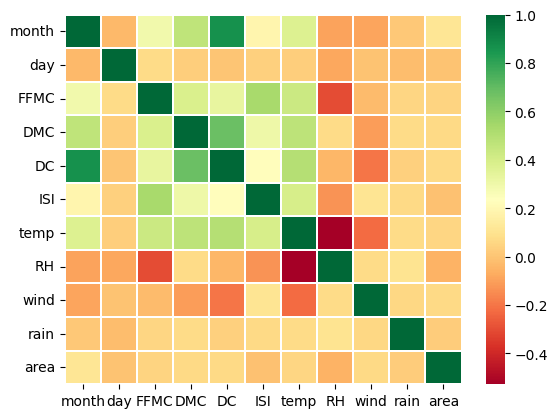

In [4]:
sns.heatmap(df.corr(), cmap ='RdYlGn', linewidths = 0.30, annot = False)  

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
print(kmeans)

KMeans(n_clusters=3, random_state=0)


In [6]:
print(np.unique(kmeans.labels_, return_counts=True))

kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])

(array([0, 1, 2], dtype=int32), array([ 89, 361,  67]))


In [7]:
# Visualize the clusters

# Enter PCA
pca = PCA(n_components=2).fit(df)

# Perform the transform
pca_trans = pca.transform(df)

pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

cluster        pca1       pca2
49         0 -447.569736  21.903802
342        1  258.417850 -28.008583
350        1  191.852818 -45.504542
125        1  130.049080 -90.049160
449        1   76.603462  58.367697

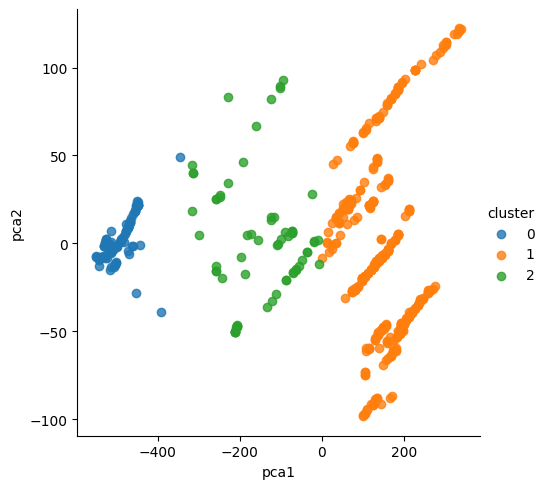

In [8]:
# Plot the results
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False)
plt.show()

Obj. Func: 6269838.209358396
Obj. Func: 3484961.03112155
Obj. Func: 2454067.5308685973
Obj. Func: 1873768.172474905
Obj. Func: 1541873.4454800708
Obj. Func: 1298218.6930479915
Obj. Func: 1061642.2960814985
Obj. Func: 943758.0627357075
Obj. Func: 772570.1201382366


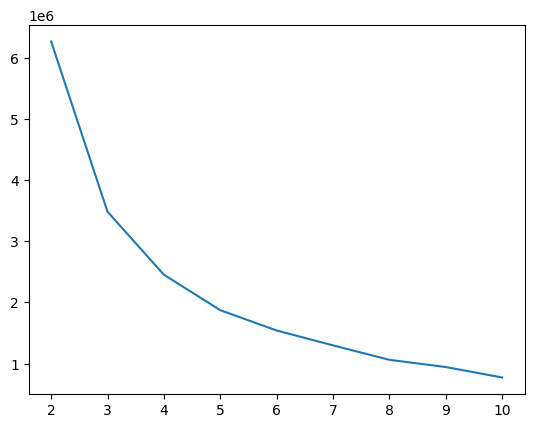

In [9]:
# Find the optimal number of clusters

clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(df)
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

# Optimal number of clusters is 3, 4, or 5

We're going to try 3, 4, and 5 clusters to see which one is the best.

KMeans(n_clusters=3, random_state=0)
(array([0, 1, 2], dtype=int32), array([ 89, 361,  67]))


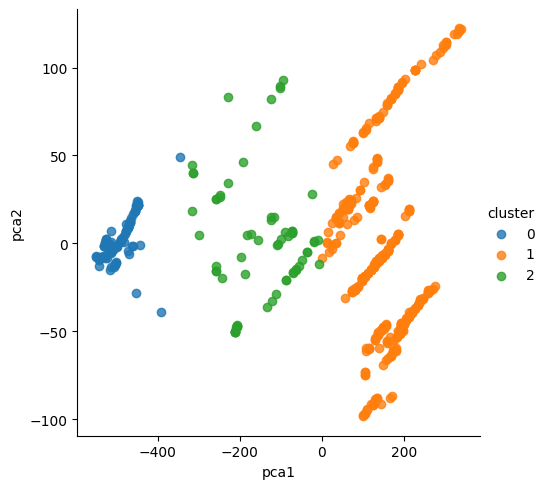

KMeans(n_clusters=4, random_state=0)
(array([0, 1, 2, 3], dtype=int32), array([ 89, 150,  62, 216]))


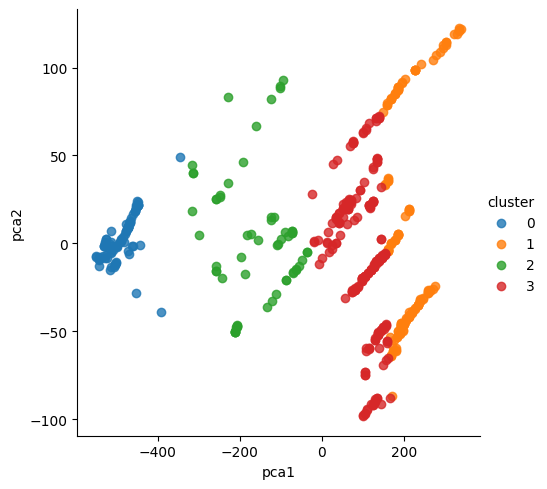

KMeans(n_clusters=5, random_state=0)
(array([0, 1, 2, 3, 4], dtype=int32), array([ 89, 190,  60, 134,  44]))


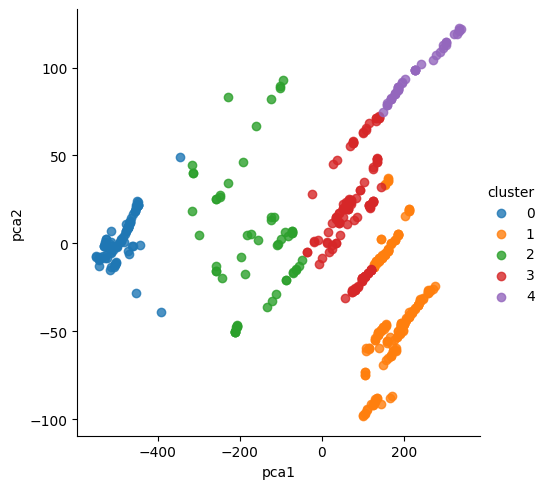

In [10]:
# Try different number of clusters

clusters = [3, 4, 5]

kmeans = [None] * len(clusters)
for i, j in enumerate(clusters):
    # for r in randomStates:
    kmeans[i] = KMeans(n_clusters=j, random_state=0).fit(df)
    print(kmeans[i])
    print(np.unique(kmeans[i].labels_, return_counts=True))
    kmeans[i] = pd.DataFrame(kmeans[i].labels_, columns=['cluster'])
    pca = PCA(n_components=2).fit(df)
    pca_trans = pca.transform(df)
    pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
    kmeans[i] = pd.concat([kmeans[i], pca_trans_df], axis=1)
    fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans[i], hue='cluster', fit_reg=False)
    plt.show()

# Try different random states with 4 clusters

KMeans(n_clusters=4, random_state=0)
(array([0, 1, 2, 3], dtype=int32), array([ 89, 150,  62, 216]))


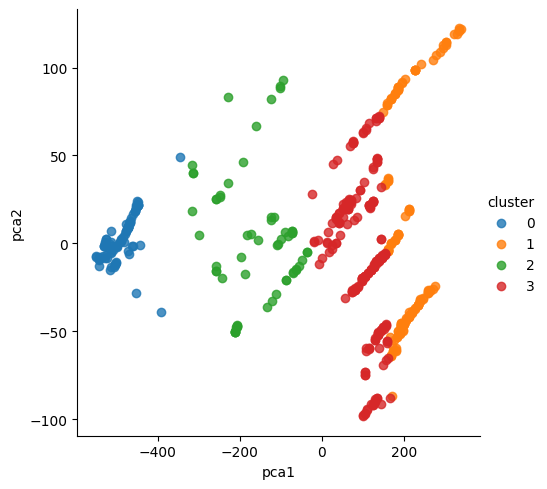

KMeans(n_clusters=4, random_state=10)
(array([0, 1, 2, 3], dtype=int32), array([148,  89, 218,  62]))


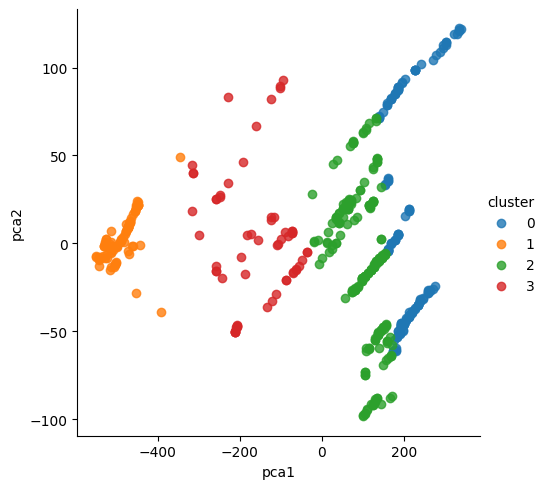

KMeans(n_clusters=4, random_state=100)
(array([0, 1, 2, 3], dtype=int32), array([ 67, 219,  89, 142]))


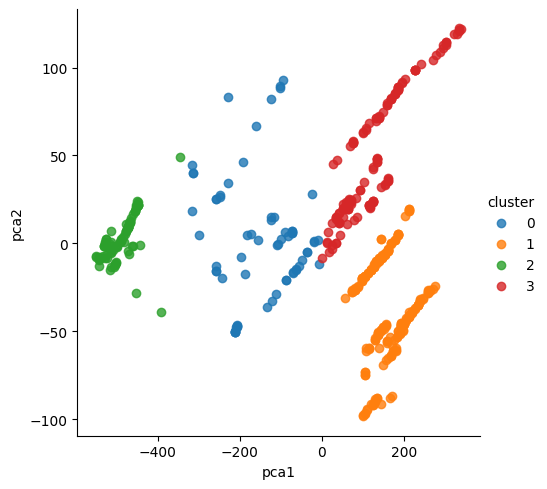

KMeans(n_clusters=4, random_state=1000)
(array([0, 1, 2, 3], dtype=int32), array([150,  89, 216,  62]))


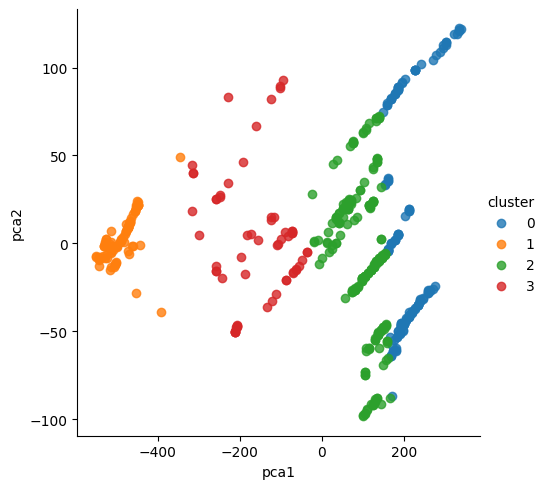

In [11]:
# Try different random states with 4 clusters
randomStates = [0, 10, 100, 1000]

for r in randomStates:
    kmeans[i] = KMeans(n_clusters=4, random_state=r).fit(df)
    print(kmeans[i])
    print(np.unique(kmeans[i].labels_, return_counts=True))
    kmeans[i] = pd.DataFrame(kmeans[i].labels_, columns=['cluster'])
    pca = PCA(n_components=2).fit(df)
    pca_trans = pca.transform(df)
    pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])
    kmeans[i] = pd.concat([kmeans[i], pca_trans_df], axis=1)
    fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans[i], hue='cluster', fit_reg=False)
    plt.show()

# Try with different random states

Random state 0 gives the best silhouette score.

In [12]:
scalers = {
    'Standard Scaler': StandardScaler(),
    'Min Max Scaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

randomStates, kmeans = [0, 10, 100, 1000], {}

KMeans(n_clusters=4, random_state=0)
(array([0, 1, 2, 3], dtype=int32), array([ 96, 282, 138,   1]))


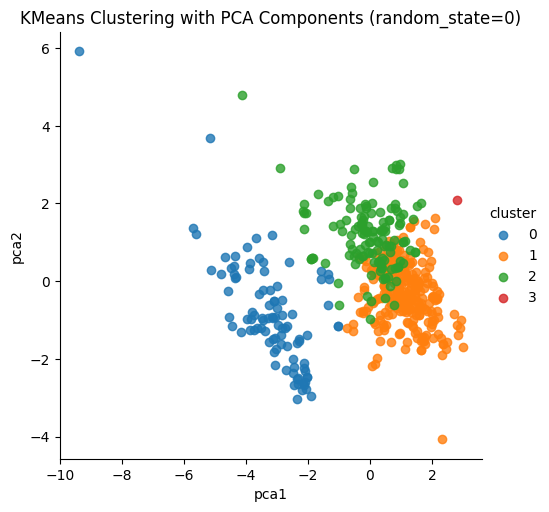

KMeans(n_clusters=4, random_state=10)
(array([0, 1, 2, 3], dtype=int32), array([201,  92, 137,  87]))


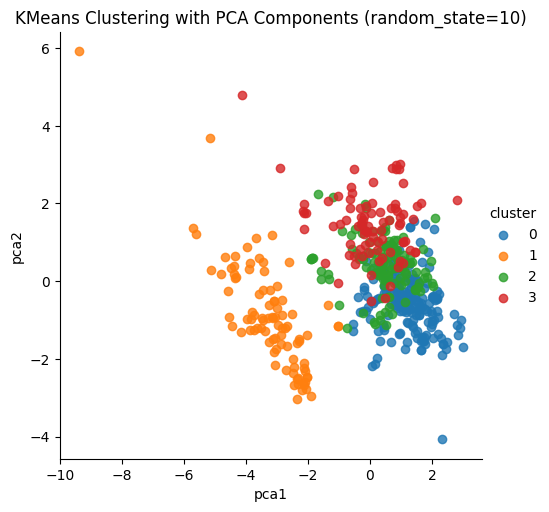

KMeans(n_clusters=4, random_state=100)
(array([0, 1, 2, 3], dtype=int32), array([ 17, 198,  91, 211]))


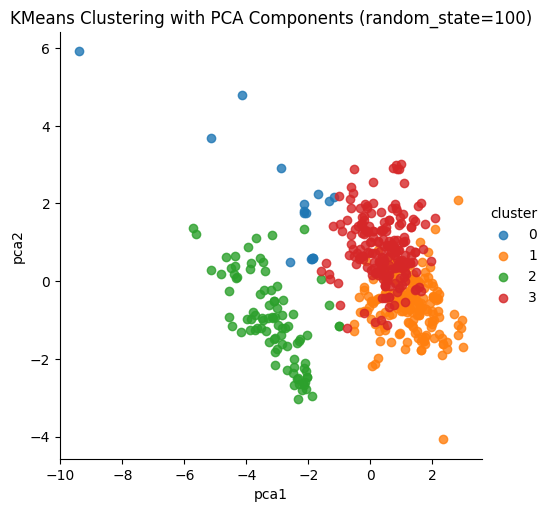

KMeans(n_clusters=4, random_state=1000)
(array([0, 1, 2, 3], dtype=int32), array([ 85, 241,  97,  94]))


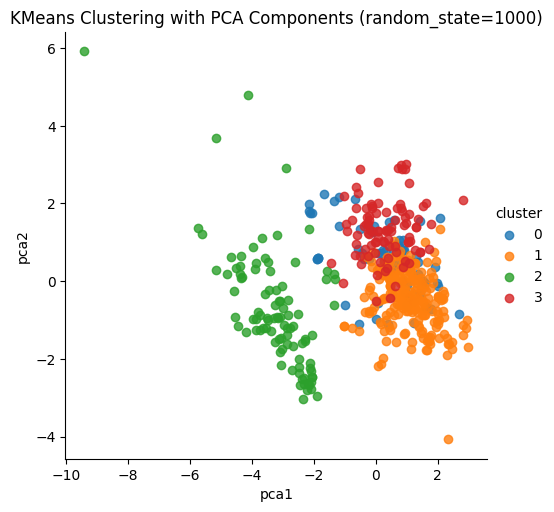

KMeans(n_clusters=4, random_state=0)
(array([0, 1, 2, 3], dtype=int32), array([ 92, 223, 144,  58]))


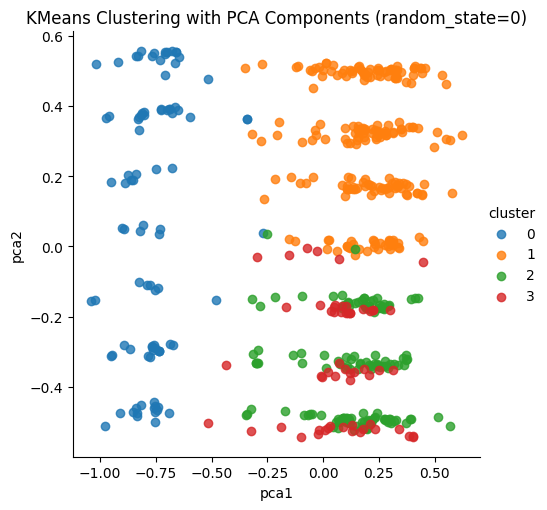

KMeans(n_clusters=4, random_state=10)
(array([0, 1, 2, 3], dtype=int32), array([189,  58, 175,  95]))


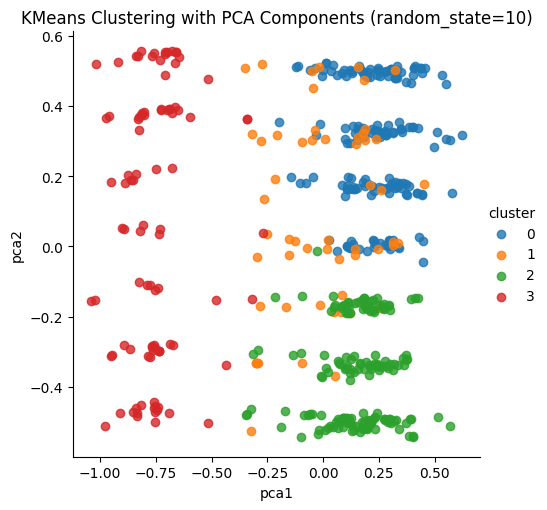

KMeans(n_clusters=4, random_state=100)
(array([0, 1, 2, 3], dtype=int32), array([ 16, 187,  95, 219]))


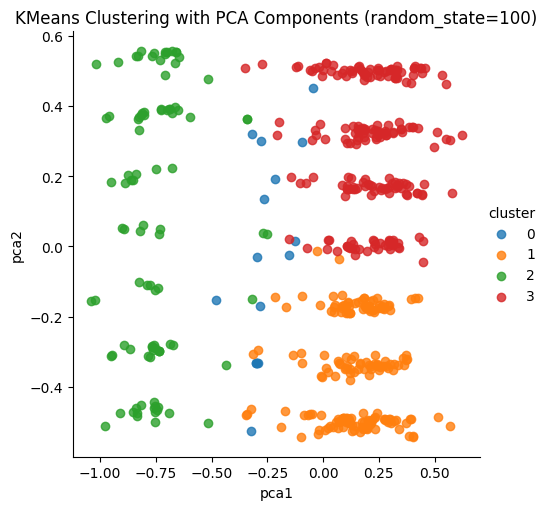

KMeans(n_clusters=4, random_state=1000)
(array([0, 1, 2, 3], dtype=int32), array([ 66, 209,  92, 150]))


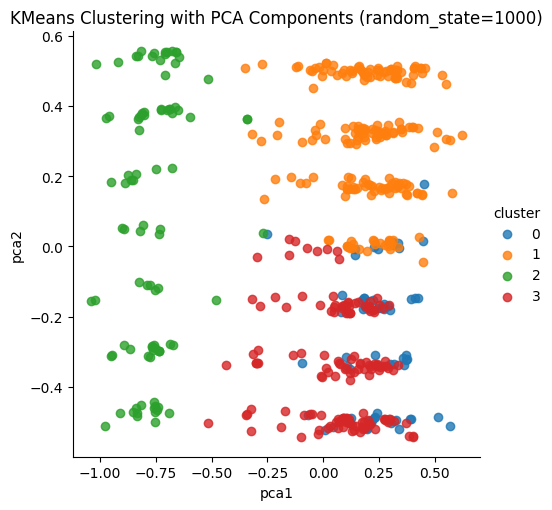

KMeans(n_clusters=4, random_state=0)
(array([0, 1, 2, 3], dtype=int32), array([ 39, 251,  48, 179]))


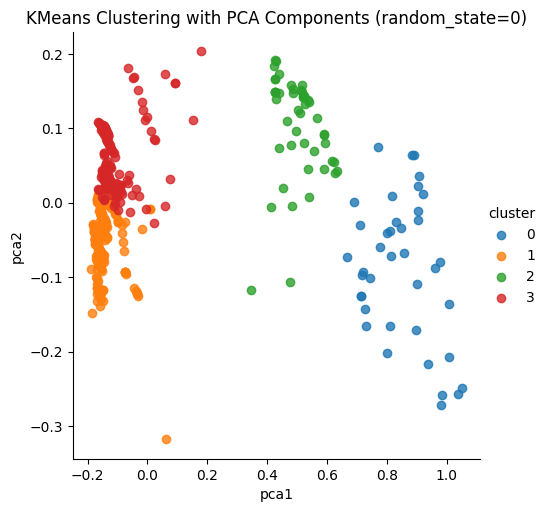

KMeans(n_clusters=4, random_state=10)
(array([0, 1, 2, 3], dtype=int32), array([179,  39,  48, 251]))


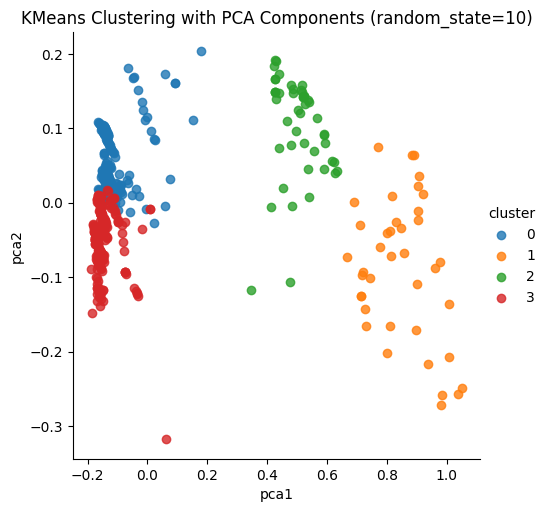

KMeans(n_clusters=4, random_state=100)
(array([0, 1, 2, 3], dtype=int32), array([ 28,  48, 402,  39]))


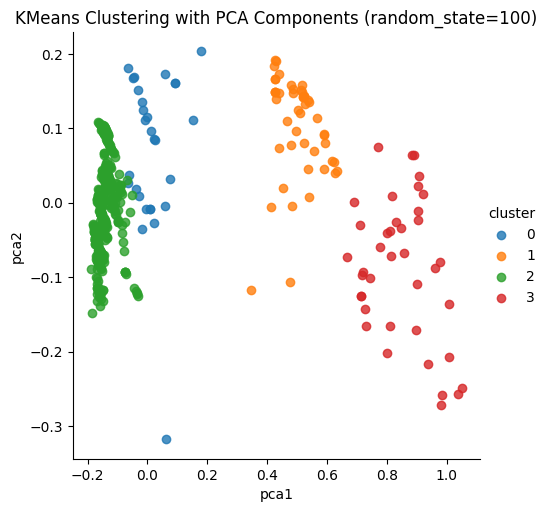

KMeans(n_clusters=4, random_state=1000)
(array([0, 1, 2, 3], dtype=int32), array([254,  48,  39, 176]))


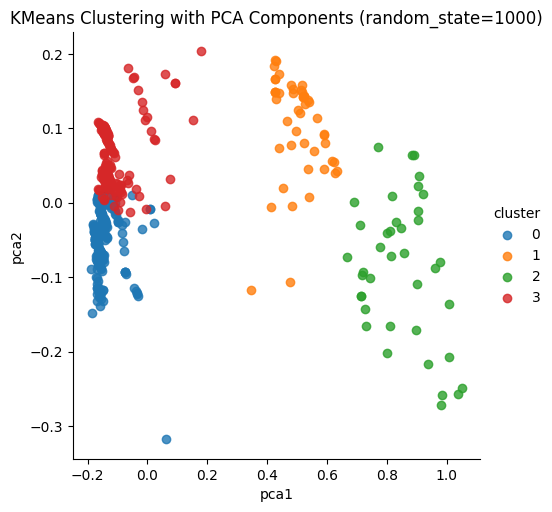

In [13]:
# Scale the features using MinMaxScaler
for scaler in scalers.values():
    for r in randomStates:
        scaled_data = scaler.fit_transform(df)

        kmeans = KMeans(n_clusters=4, random_state=r).fit(scaled_data)
        print(kmeans)
        print(np.unique(kmeans.labels_, return_counts=True))

        # Create a DataFrame for cluster labels
        cluster_df = pd.DataFrame(kmeans.labels_, columns=['cluster'])

        # Perform PCA
        pca = PCA(n_components=2).fit(scaled_data)
        pca_trans = pca.transform(scaled_data)
        pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

        # Concatenate cluster labels and PCA components
        result_df = pd.concat([cluster_df, pca_trans_df], axis=1)

        # Plot the results using sns.lmplot
        fig = sns.lmplot(x='pca1', y='pca2', data=result_df, hue='cluster', fit_reg=False)
        plt.title(f'KMeans Clustering with PCA Components (random_state={r})')
        plt.show()

KMeans(n_clusters=3, random_state=0)
(array([0, 1, 2], dtype=int32), array([ 96, 289, 132]))
KMeans(n_clusters=3, random_state=0)
(array([0, 1, 2], dtype=int32), array([ 96, 227, 194]))
KMeans(n_clusters=3, random_state=0)
(array([0, 1, 2], dtype=int32), array([ 39, 429,  49]))


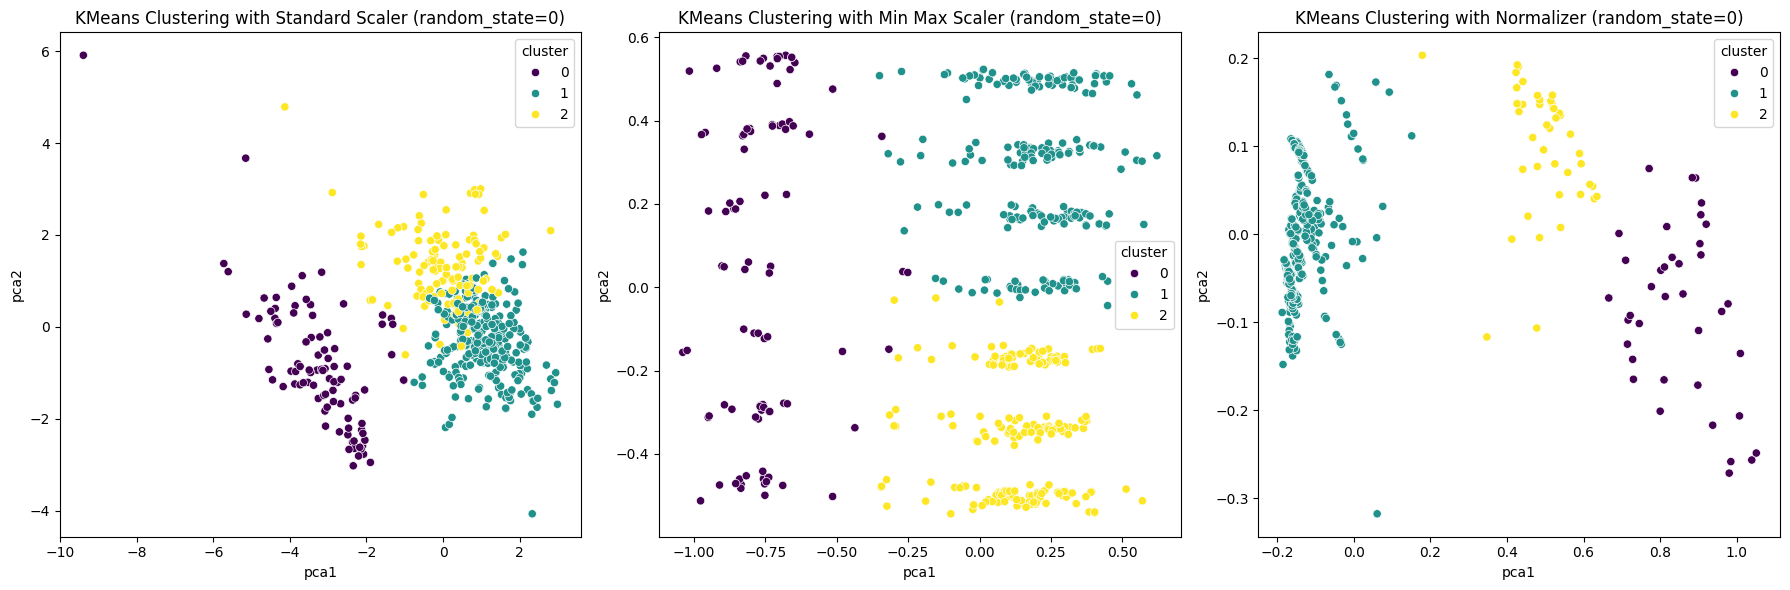

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (label, scaler) in zip(axes, scalers.items()):
    scaled_data = scaler.fit_transform(df)

    kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)
    print(kmeans)
    print(np.unique(kmeans.labels_, return_counts=True))

    # Create a DataFrame for cluster labels
    cluster_df = pd.DataFrame(kmeans.labels_, columns=['cluster'])

    # Perform PCA
    pca = PCA(n_components=2).fit(scaled_data)
    pca_trans = pca.transform(scaled_data)
    pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

    # Concatenate cluster labels and PCA components
    result_df = pd.concat([cluster_df, pca_trans_df], axis=1)

    # Plot the results using sns.lmplot
    sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=result_df, ax=ax, palette='viridis')
    # sns.lmplot(x='pca1', y='pca2', data=result_df, hue='cluster', fit_reg=False)
    plt.title(f'KMeans Clustering with {label} (random_state={0})')
    ax.set_title(f'KMeans Clustering with {label} (random_state=0)')
    # plt.show)

# Adjust layout and display the figures
plt.tight_layout()
plt.show()

# Hierarchical Clustering


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy

In [16]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
forest_fire = pd.read_csv(url)

month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
day_mapping = {
    'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7
}

forest_fire['month'] = forest_fire['month'].map(month_mapping)
forest_fire['day'] = forest_fire['day'].map(day_mapping)


forest_fire.head()

X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5      3    6  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10    3  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10    7  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6      3    6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6      3    1  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

## Hierachical Clustering on Raw Data

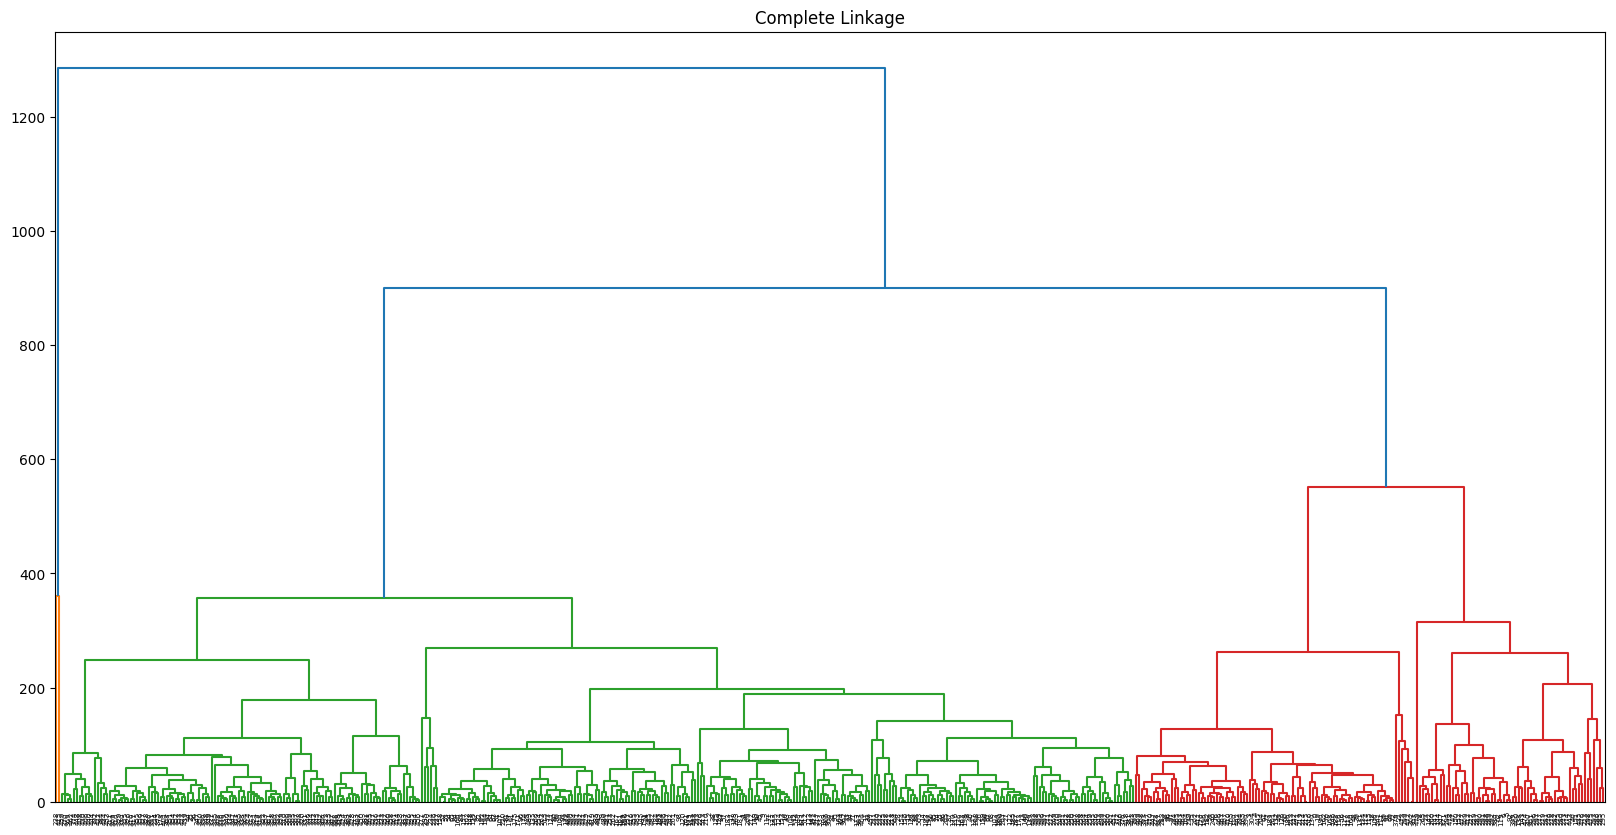

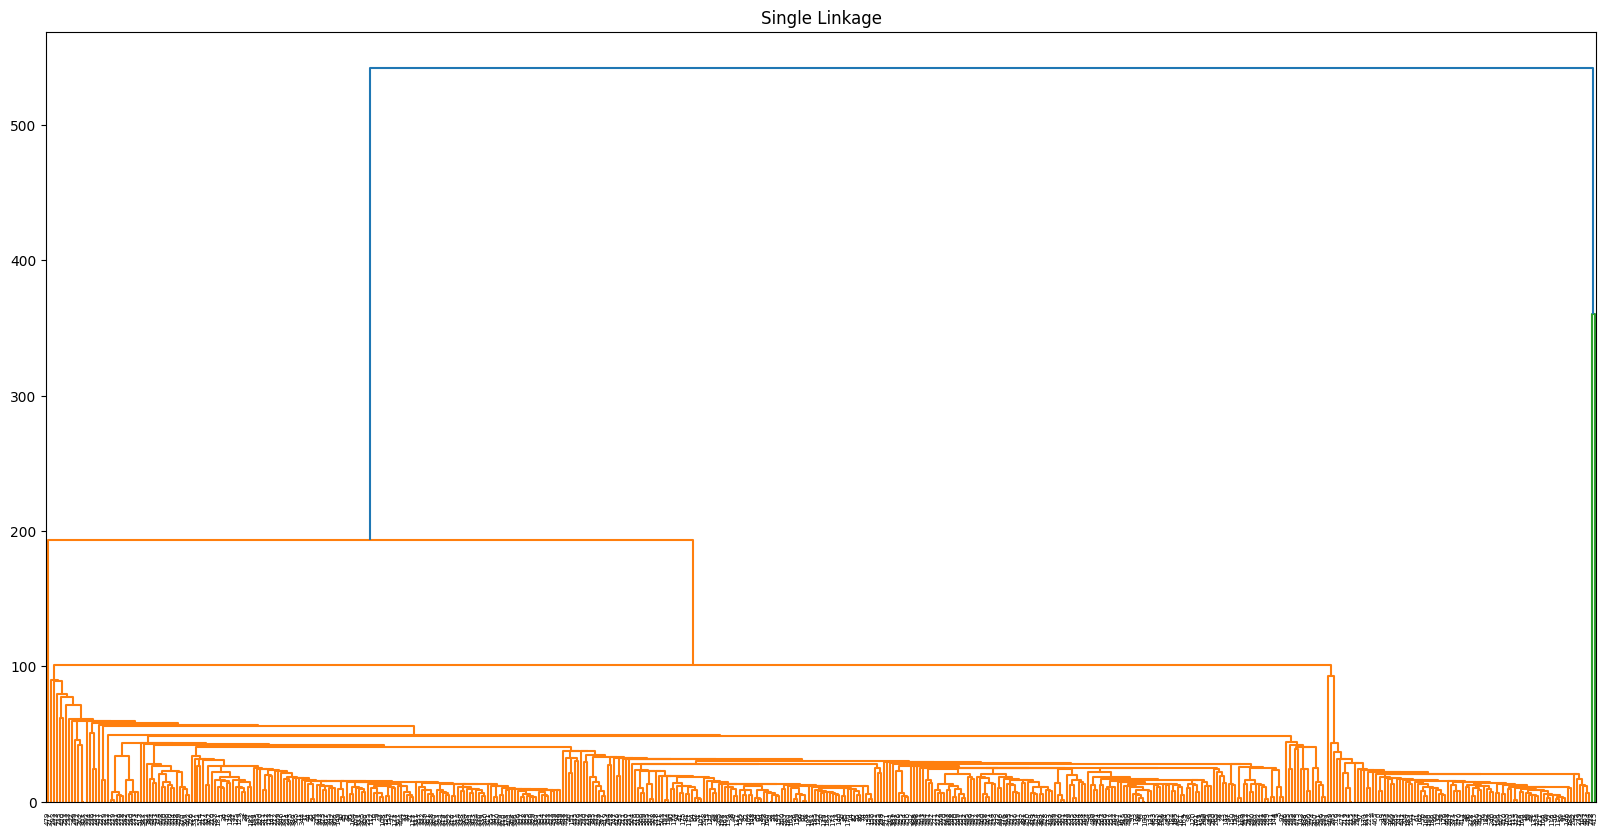

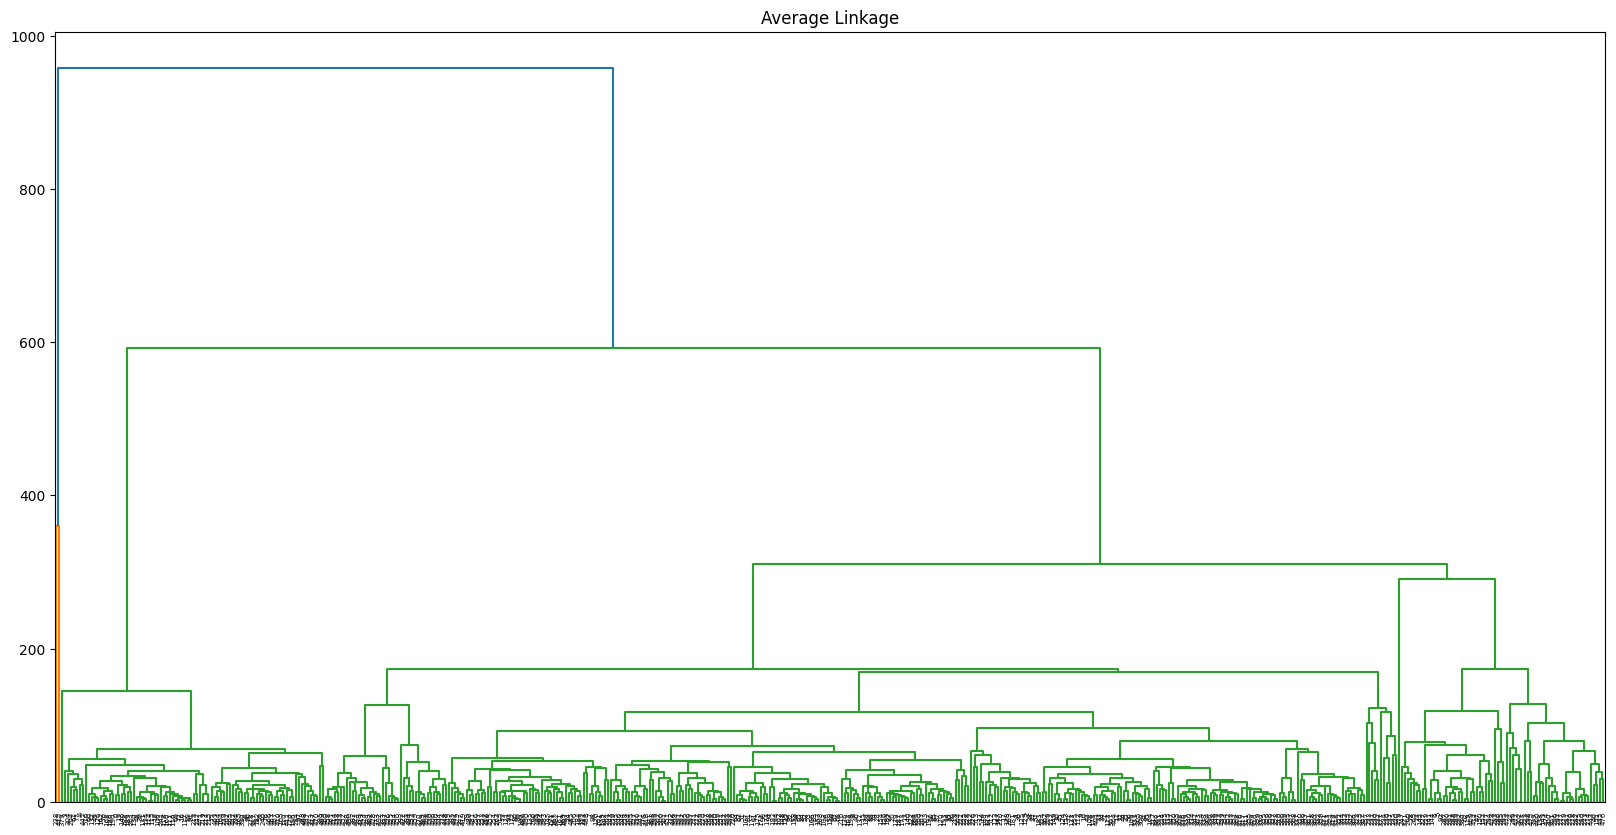

In [17]:
forest_fire_complete = hierarchy.complete(forest_fire)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_complete)
plt.title('Complete Linkage')

forest_fire_single = hierarchy.single(forest_fire)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_single)
plt.title('Single Linkage')

forest_fire_average = hierarchy.average(forest_fire)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_average)
plt.title('Average Linkage')

plt.show()

## Transforming/Dropping Columns
-   Dropping spatial coordinates X,Y which may not be directly relevant to clustering based on environmental and fire conditions
-   Apply log transformation to `area` due to high skewness
 

In [18]:
forest_fire_transformed = forest_fire.copy()

forest_fire_transformed['area'] = np.log1p(forest_fire_transformed['area'])
forest_fire_transformed=forest_fire_transformed.drop(['month','day'],axis=1)
forest_fire_transformed=forest_fire_transformed.drop(['X','Y'],axis=1)
forest_fire_transformed.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

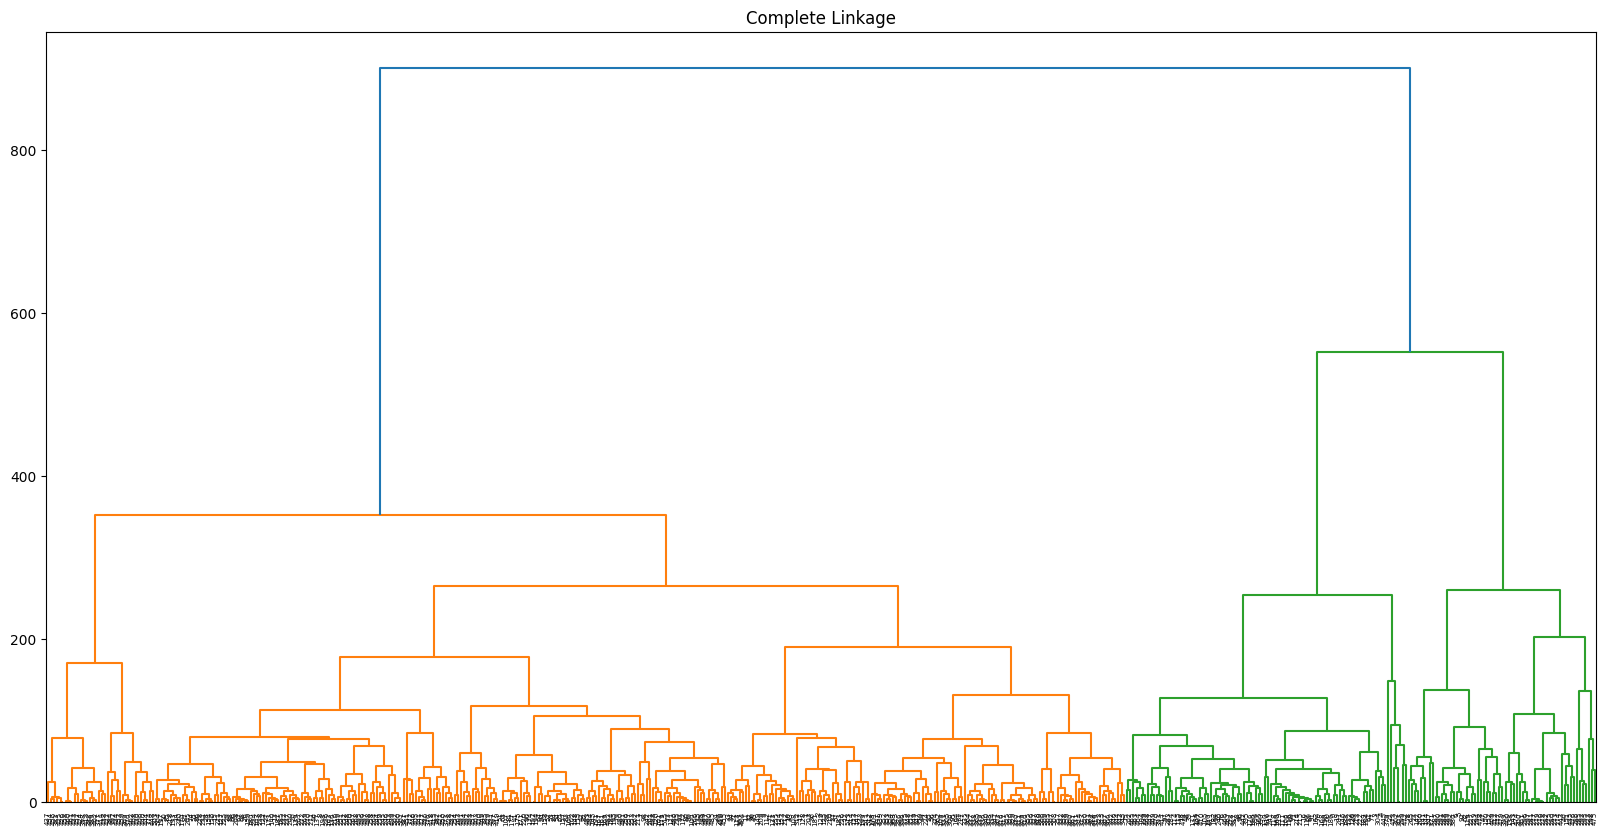

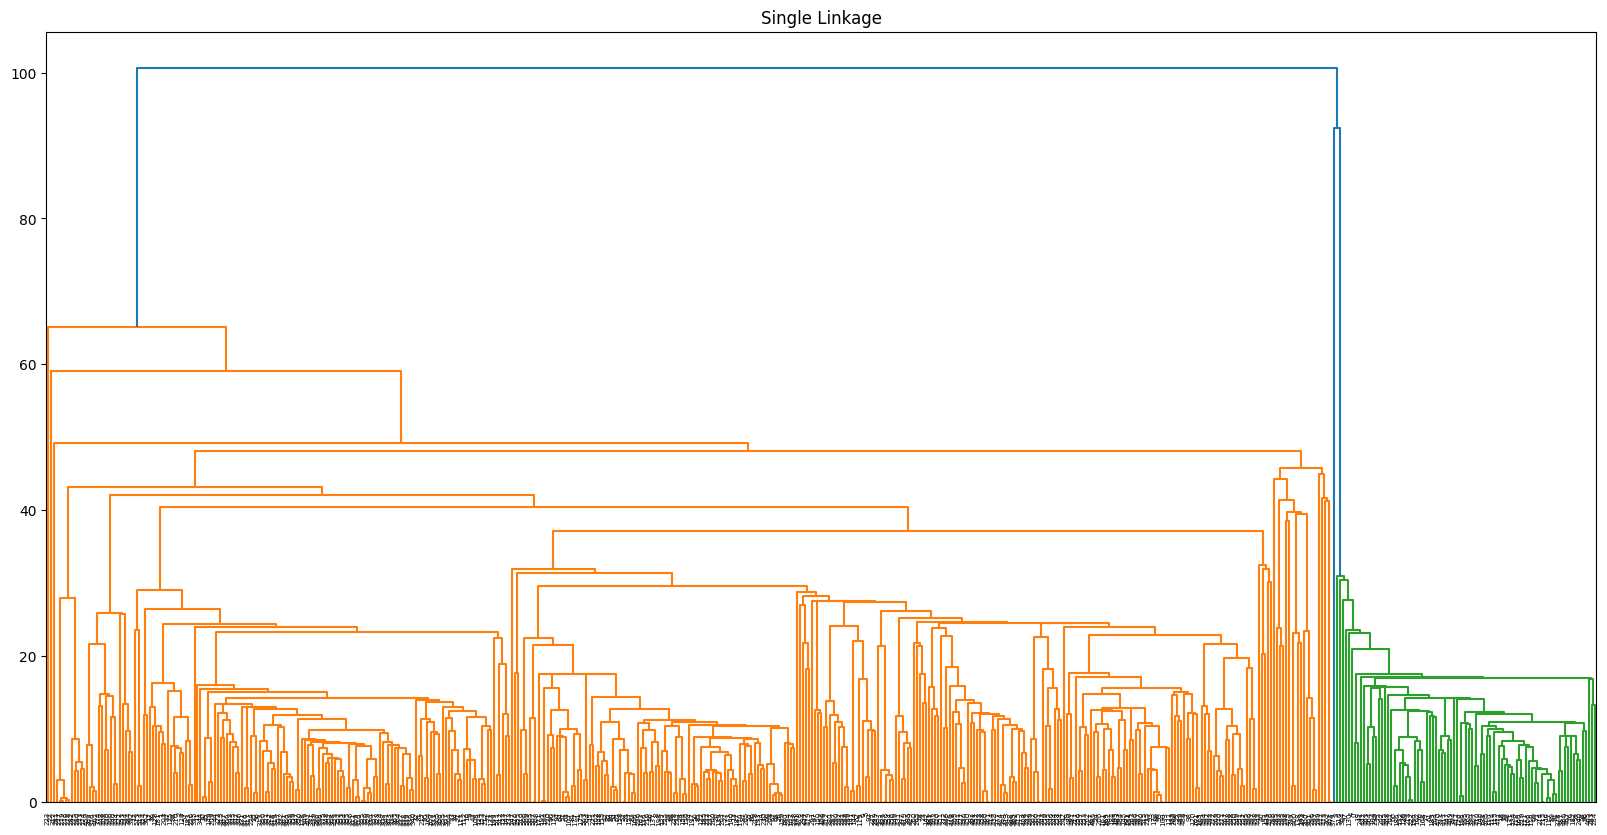

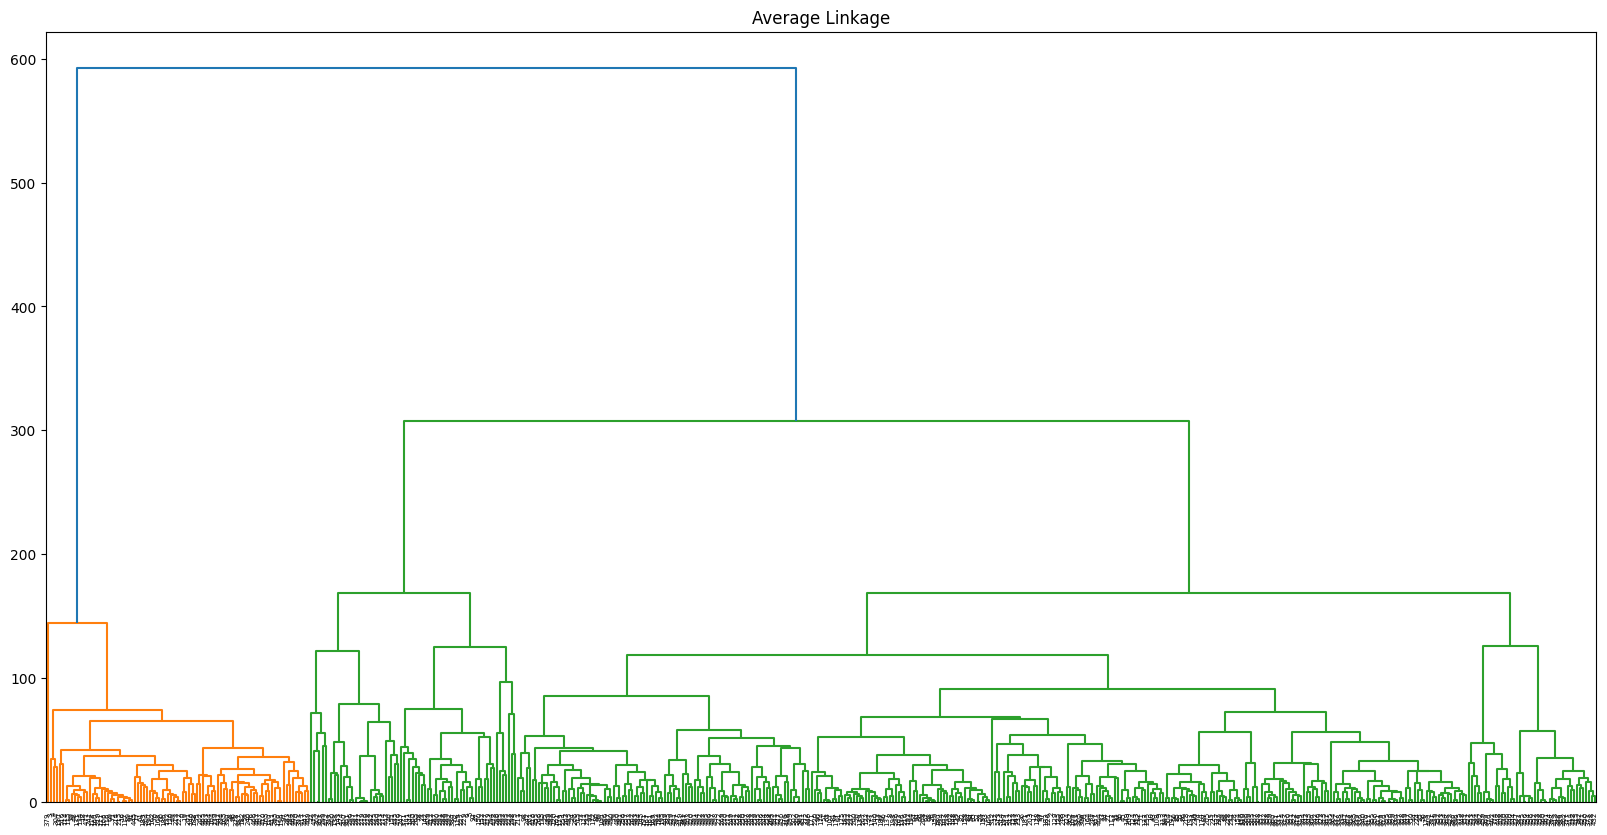

In [19]:
forest_fire_complete = hierarchy.complete(forest_fire_transformed)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_complete)
plt.title('Complete Linkage')

forest_fire_single = hierarchy.single(forest_fire_transformed)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_single)
plt.title('Single Linkage')

forest_fire_average = hierarchy.average(forest_fire_transformed)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_average)
plt.title('Average Linkage')

plt.show()

-   Data transformation has dramatically improve our clusterings.

## Standard Scaler
-   Standardize our data to have a mean of 0 and standard deviation of 1.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
forest_fire_standardized = scaler.fit_transform(forest_fire_transformed)
forest_fire_standardized = pd.DataFrame(forest_fire_standardized, columns=forest_fire_transformed.columns)
forest_fire_standardized.head()

FFMC       DMC        DC       ISI      temp        RH      wind  \
0 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640  0.411724  1.498614   
1 -0.008102 -1.179541  0.488891 -0.509688 -0.153278 -0.692456 -1.741756   
2 -0.008102 -1.049822  0.560715 -0.509688 -0.739383 -0.692456 -1.518282   
3  0.191362 -1.212361 -1.898266 -0.004756 -1.825402  3.233519 -0.009834   
4 -0.243833 -0.931043 -1.798600  0.126966 -1.291012  3.356206 -1.238940   

       rain      area  
0 -0.073268 -0.795247  
1 -0.073268 -0.795247  
2 -0.073268 -0.795247  
3  0.603155 -0.795247  
4 -0.073268 -0.795247

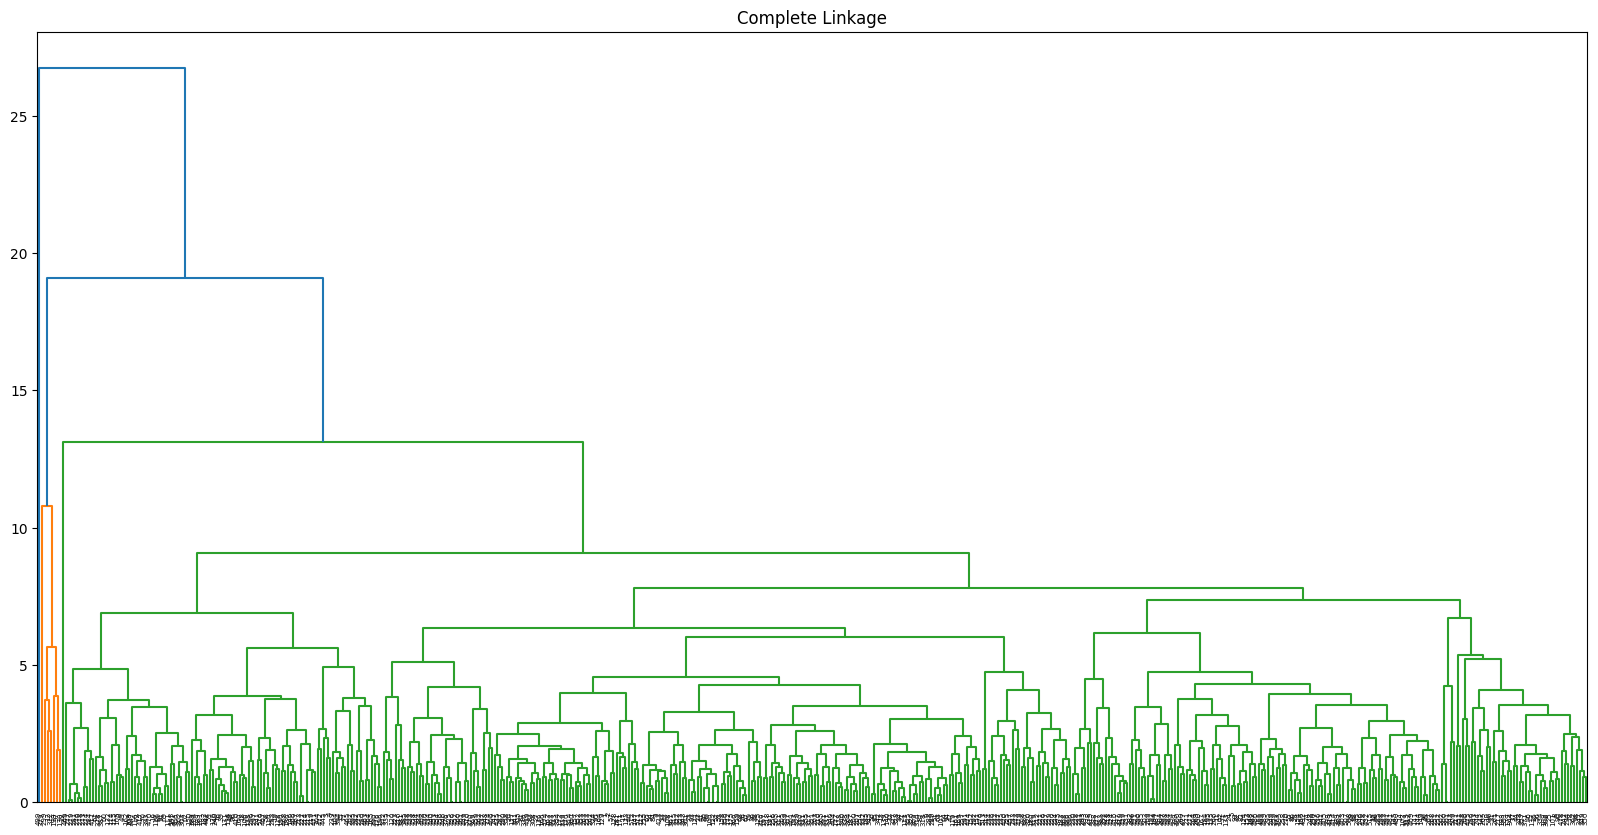

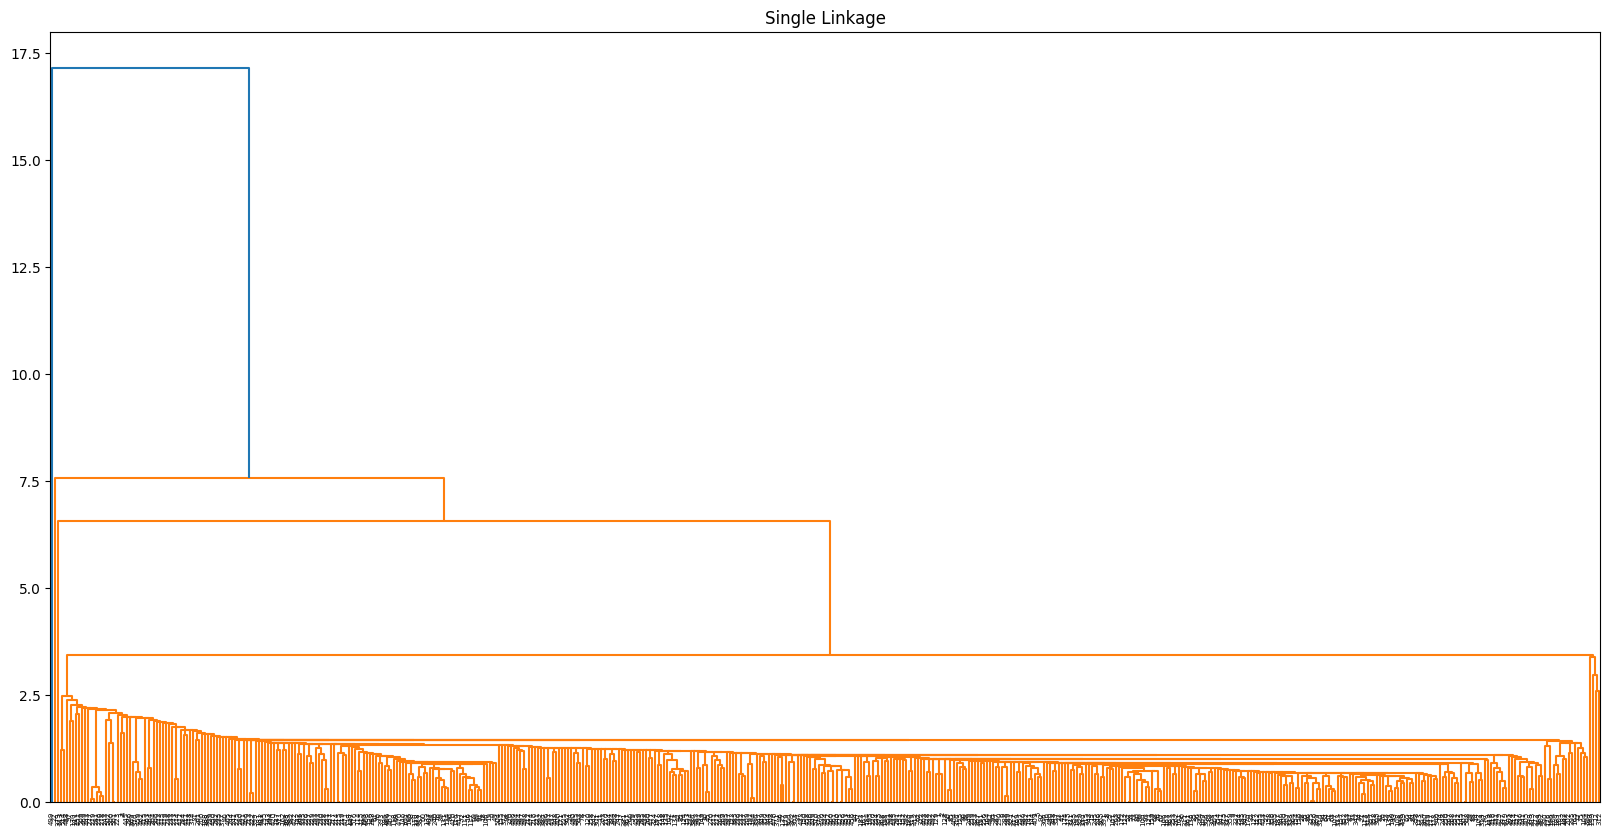

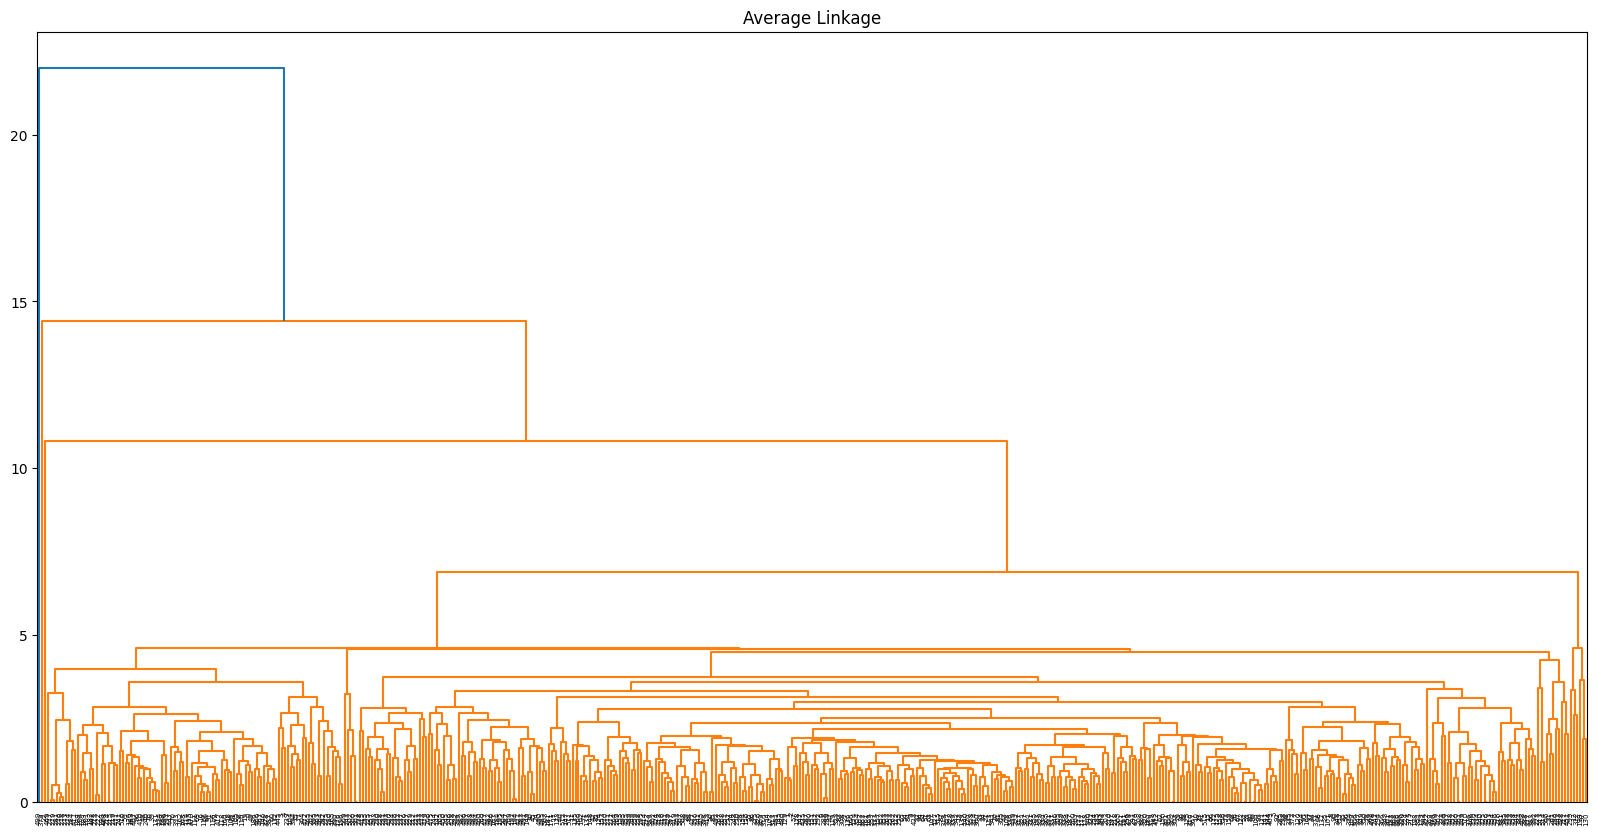

In [21]:
forest_fire_standardized_complete = hierarchy.complete(forest_fire_standardized)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_standardized_complete)
plt.title('Complete Linkage')

forest_fire_standardized_single = hierarchy.single(forest_fire_standardized)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_standardized_single)
plt.title('Single Linkage')

forest_fire_standardized_average = hierarchy.average(forest_fire_standardized)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_standardized_average)
plt.title('Average Linkage')

plt.show()

## MinMax Scaler
-    Normalizing our raw data to have all features in a range of [0,1]

In [22]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
forest_fire_normalized = min_max_scaler.fit_transform(forest_fire_transformed)
forest_fire_normalized = pd.DataFrame(forest_fire_normalized, columns=forest_fire_transformed.columns)
forest_fire_normalized.head()

FFMC       DMC        DC       ISI      temp        RH      wind  \
0  0.870968  0.086492  0.101325  0.090909  0.192926  0.423529  0.700000   
1  0.927742  0.118194  0.775419  0.119430  0.508039  0.211765  0.055556   
2  0.927742  0.146795  0.796294  0.119430  0.398714  0.211765  0.100000   
3  0.941935  0.110958  0.081623  0.160428  0.196141  0.964706  0.400000   
4  0.910968  0.172984  0.110590  0.171123  0.295820  0.988235  0.155556   

      rain  area  
0  0.00000   0.0  
1  0.00000   0.0  
2  0.00000   0.0  
3  0.03125   0.0  
4  0.00000   0.0

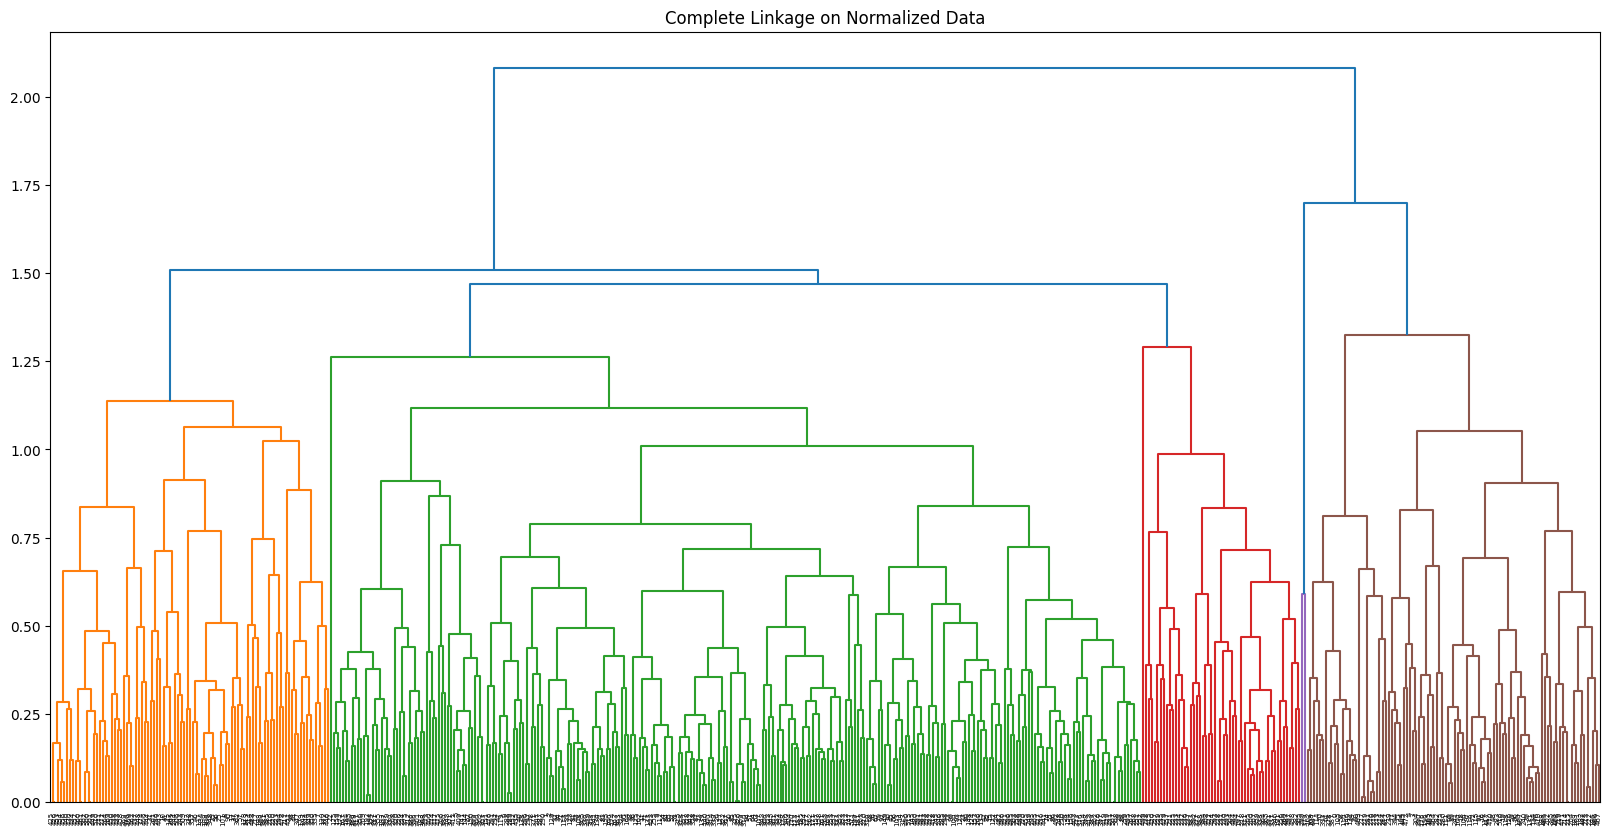

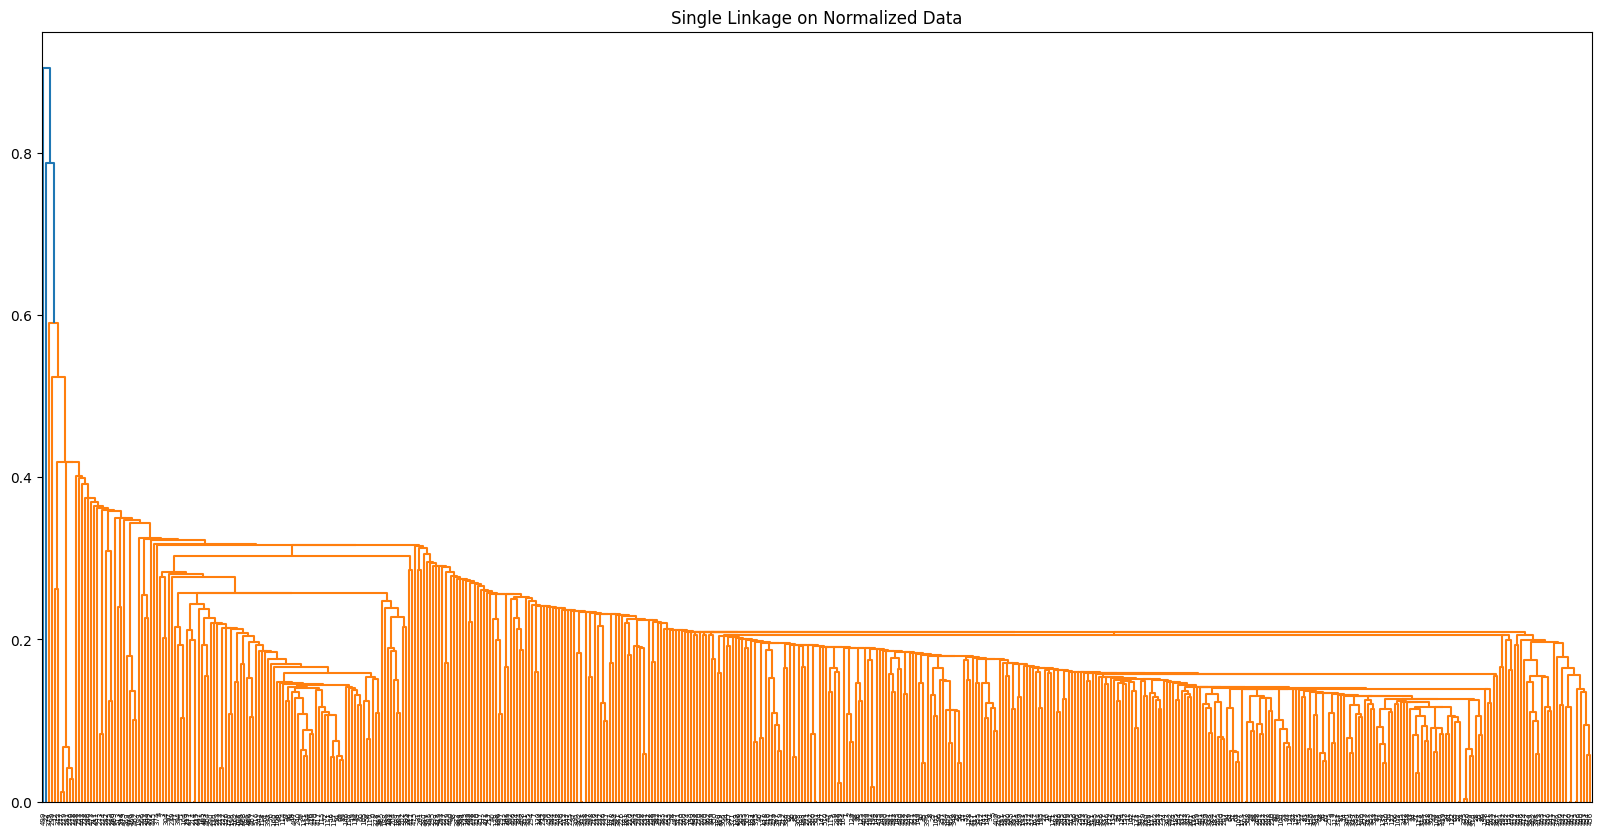

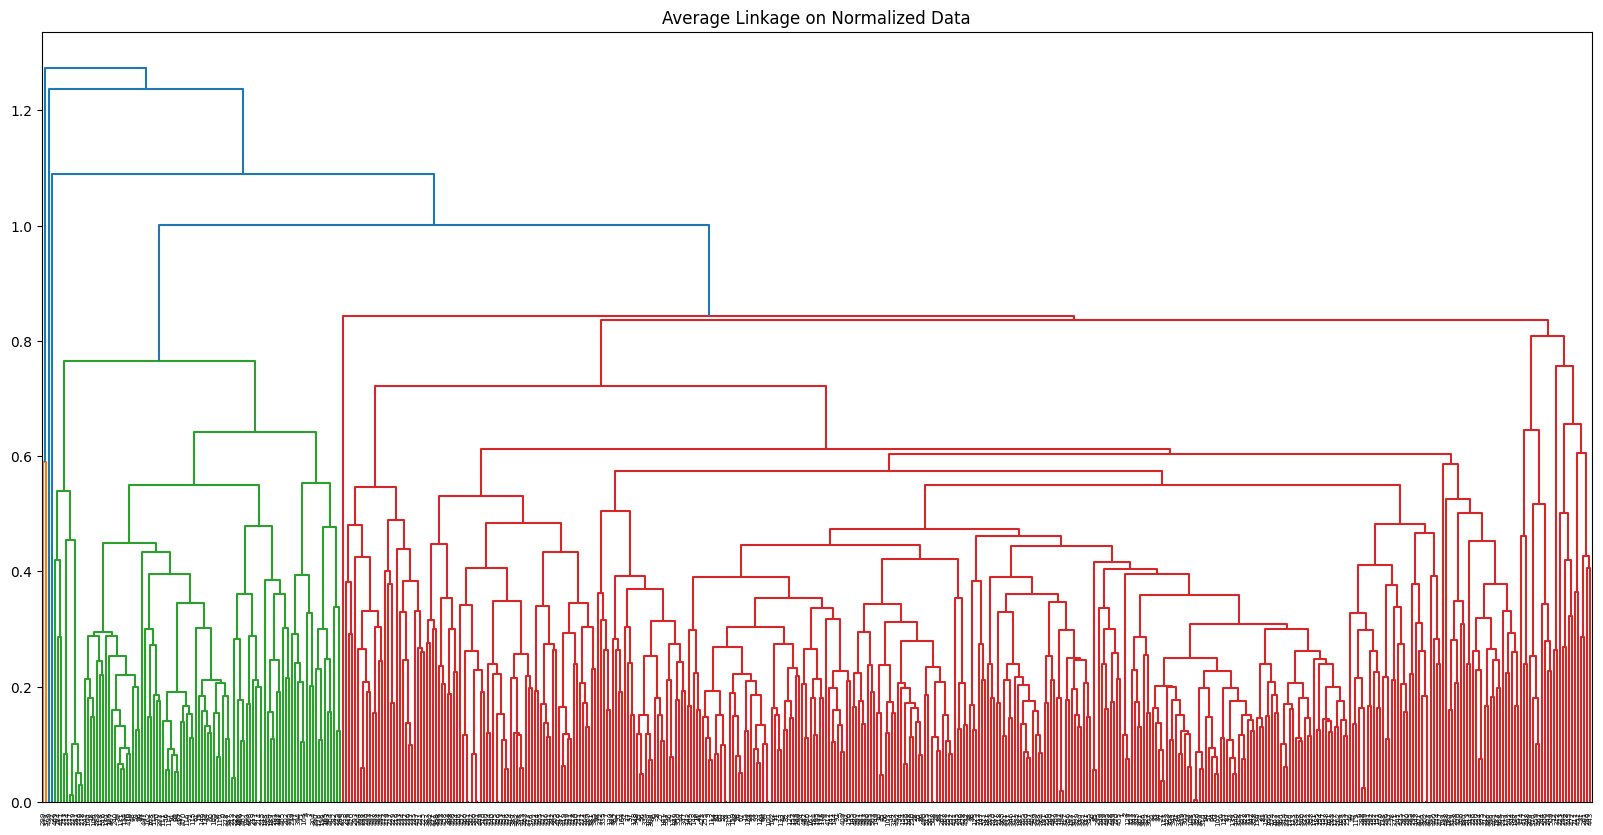

In [23]:
forest_fire_complete_normalized = hierarchy.complete(forest_fire_normalized)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_complete_normalized)
plt.title('Complete Linkage on Normalized Data')

forest_fire_single_normalized = hierarchy.single(forest_fire_normalized)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_single_normalized)
plt.title('Single Linkage on Normalized Data')

forest_fire_average_normalized = hierarchy.average(forest_fire_normalized)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_average_normalized)
plt.title('Average Linkage on Normalized Data')

plt.show()

## PCA

In [24]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # You can change the number of components
forest_fire_pca = pca.fit_transform(forest_fire_transformed)

# Convert the result to a DataFrame for better readability
forest_fire_pca = pd.DataFrame(forest_fire_pca, columns=['PC1', 'PC2'])
forest_fire_pca.head()

PC1        PC2
0 -461.613985  -1.726608
1  105.644449 -96.511457
2  124.603142 -91.624116
3 -476.906858  10.983131
4 -449.360948  24.338194

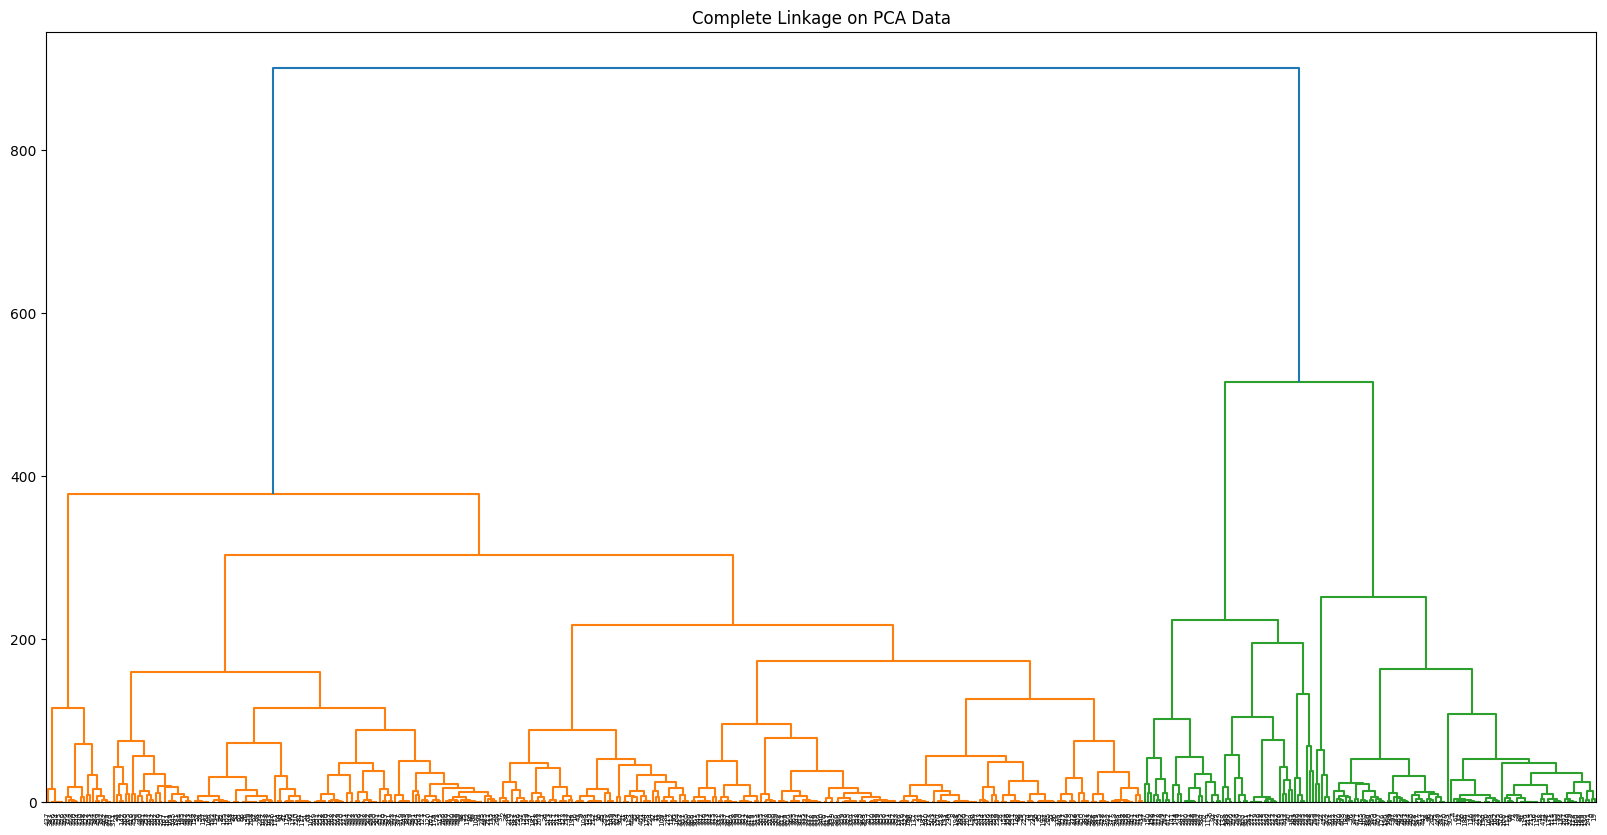

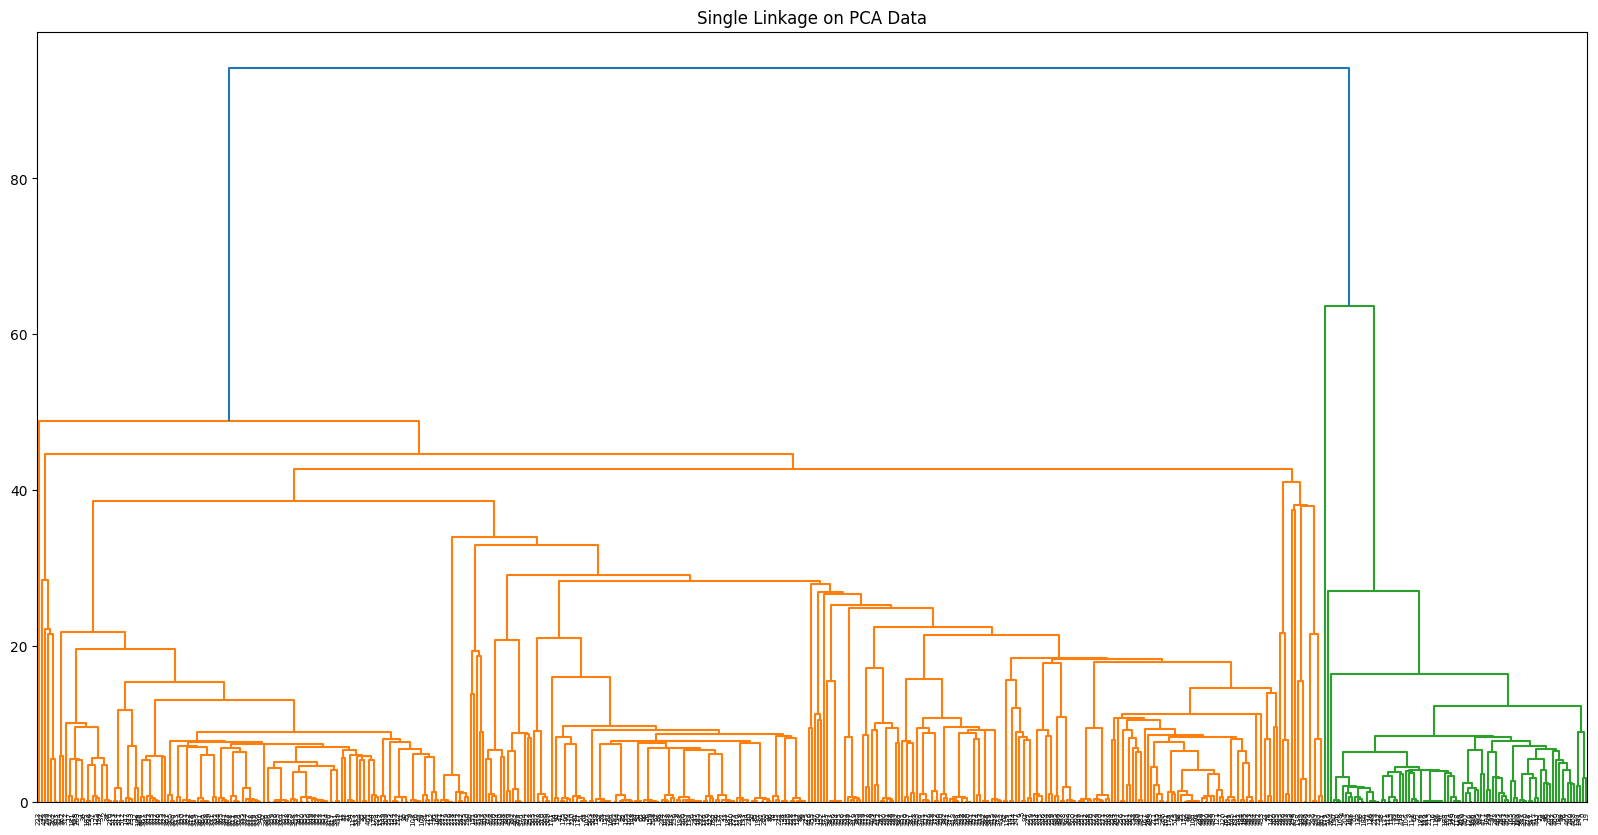

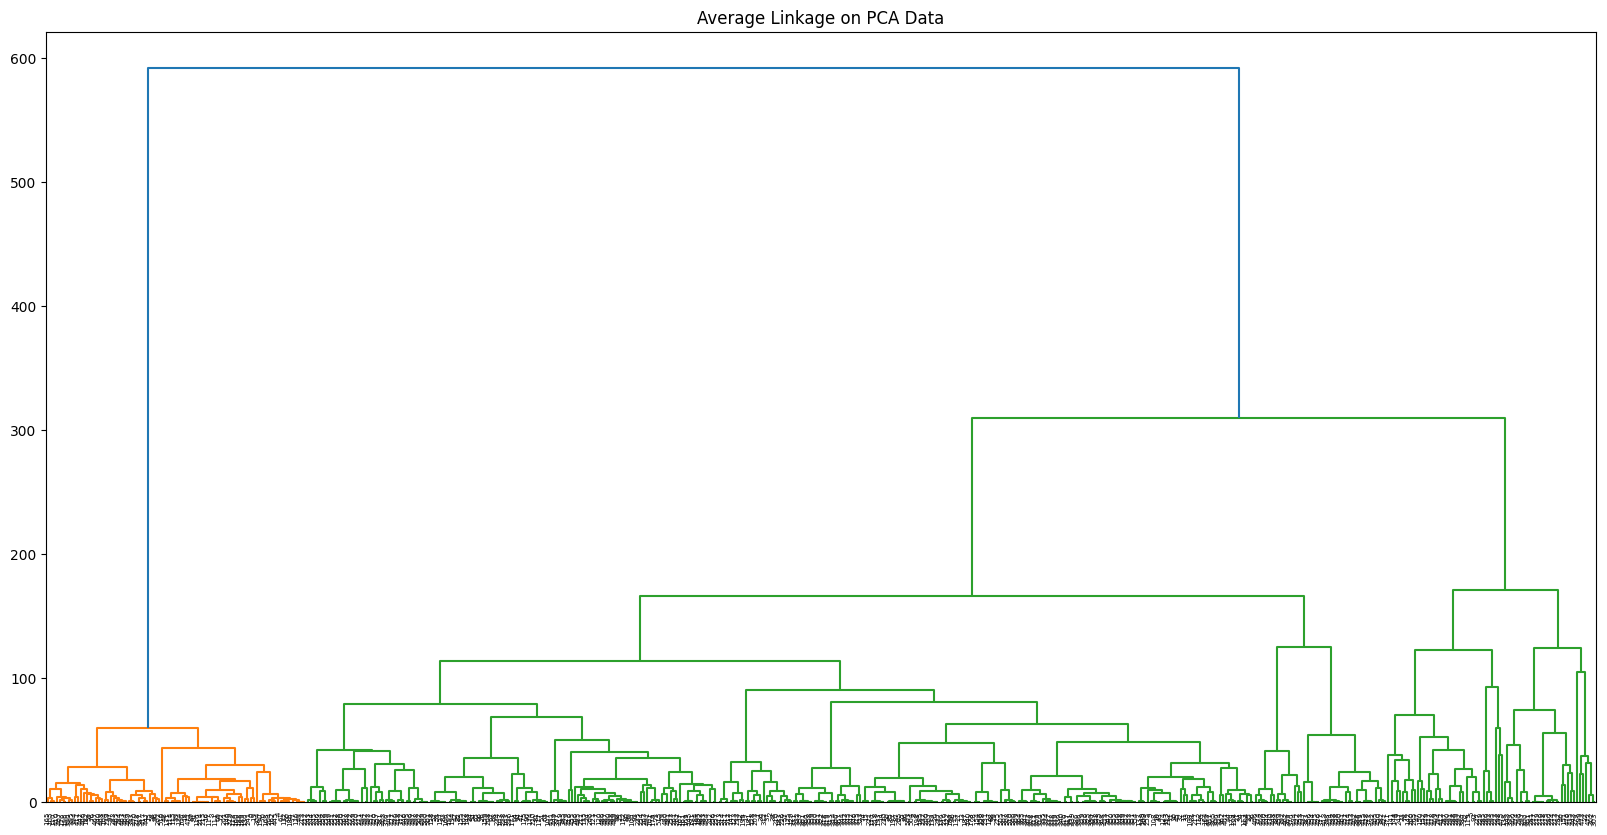

In [25]:
forest_fire_complete_pca = hierarchy.complete(forest_fire_pca)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_complete_pca)
plt.title('Complete Linkage on PCA Data')

forest_fire_single_pca = hierarchy.single(forest_fire_pca)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_single_pca)
plt.title('Single Linkage on PCA Data')

forest_fire_average_pca = hierarchy.average(forest_fire_pca)
fig = plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(forest_fire_average_pca)
plt.title('Average Linkage on PCA Data')

plt.show()

[1 2 2 1 1 0 0 0 2 2 2 2 2 2 2 2 1 2 1 1 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 0 2 2 2 2 2 2 0 1 1 2 2 2 2 2 2 2 2 1 1 1 1 0 2 2 2 2 2 2 1 1 2 1 0
 2 1 1 1 0 0 0 2 2 2 2 2 2 2 2 1 2 1 0 0 2 2 1 1 0 0 0 0 2 2 1 1 1 2 2 2 1
 1 2 2 1 1 1 1 1 0 0 0 2 2 2 2 1 2 2 2 1 1 1 2 1 0 2 2 0 2 2 0 0 0 0 0 1 2
 2 2 0 0 0 2 2 2 2 2 2 2 1 0 1 2 2 1 2 0 1 0 2 2 0 2 2 2 1 2 2 0 2 2 1 2 0
 2 1 2 1 1 1 0 2 2 2 0 1 2 2 2 2 1 1 2 1 2 0 2 2 2 2 0 2 1 1 1 2 2 2 1 2 2
 1 0 2 2 2 0 2 0 2 2 2 2 2 0 2 2 2 1 1 1 0 2 2 2 2 0 2 2 2 2 2 0 0 2 0 0 2
 2 0 0 0 0 2 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 1 1 0 2 2 2 2 2 2 1 2 2 1 2 2 1 1 1 2 2 2 0 0 2 2 2 2 2 2
 1 2 0 1 1 0 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 0
 2 1 2 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 

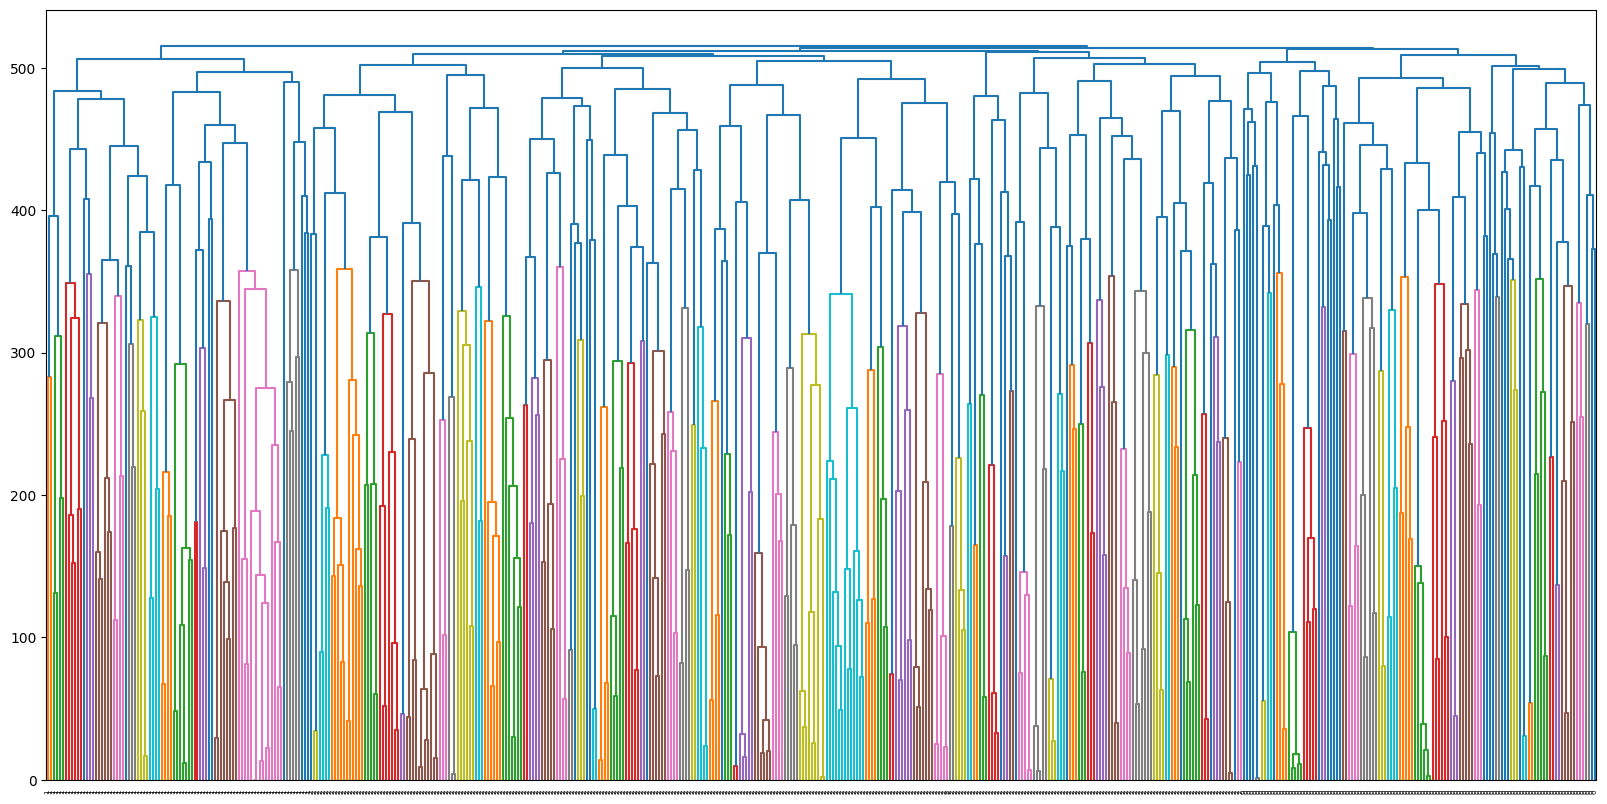

In [26]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
c = AgglomerativeClustering(3).fit(forest_fire_transformed)

fig = plt.figure(figsize=(20, 10))
plot_dendrogram(c, labels=c.labels_)
print(c.labels_)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

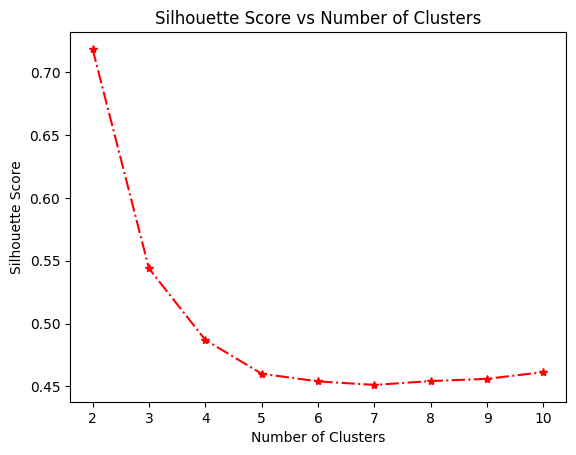

In [27]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [AgglomerativeClustering(n_clusters=k).fit(forest_fire_transformed.values) for k in k_range]
sscores = [silhouette_score(forest_fire_transformed.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

# Gaussian Mixture Model

Obj. Func: Lower Bound: -26.182105472602792 Iteration: 18
Obj. Func: Lower Bound: -25.104125901432624 Iteration: 14
Obj. Func: Lower Bound: -23.110352473477814 Iteration: 27
Obj. Func: Lower Bound: -23.426015399684754 Iteration: 12
Obj. Func: Lower Bound: -21.62319650575689 Iteration: 16
Obj. Func: Lower Bound: -22.592475598268 Iteration: 16
Obj. Func: Lower Bound: -19.935650215252807 Iteration: 28
Obj. Func: Lower Bound: -21.279519048117084 Iteration: 15
Obj. Func: Lower Bound: -19.894832048634807 Iteration: 15


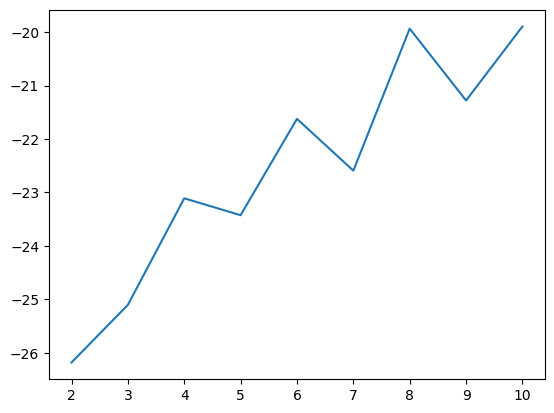

In [28]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    gmm = GaussianMixture(n_components = i, random_state=0).fit(df) 
    print("Obj. Func:", "Lower Bound:", gmm.lower_bound_, "Iteration:", gmm.n_iter_)
    objFuncs.append(gmm.lower_bound_)

plt.plot(clusterRange, objFuncs)

# Try with different Scaling methods

In [29]:
scalers = {
    'Standard Scaler': StandardScaler(),
    'Min Max Scaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

randomStates, kmeans = [0, 10, 100, 1000], {}

StandardScaler()
GaussianMixture(n_components=3, random_state=0)
(array([0, 1, 2]), array([ 88, 403,  26]))


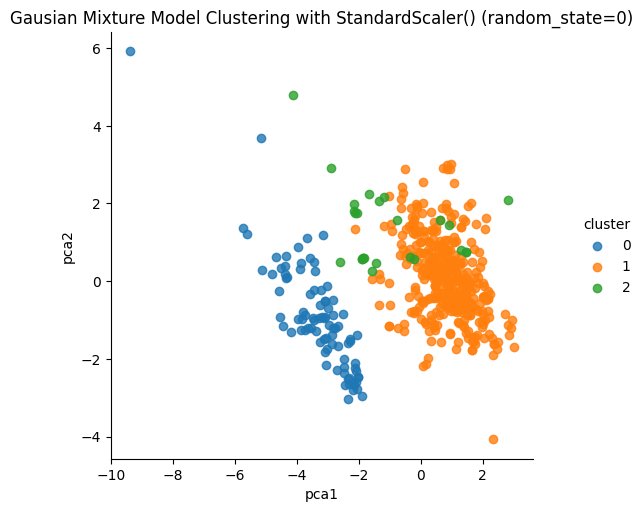

GaussianMixture(n_components=3, random_state=10)
(array([0, 1, 2]), array([ 10, 124, 383]))


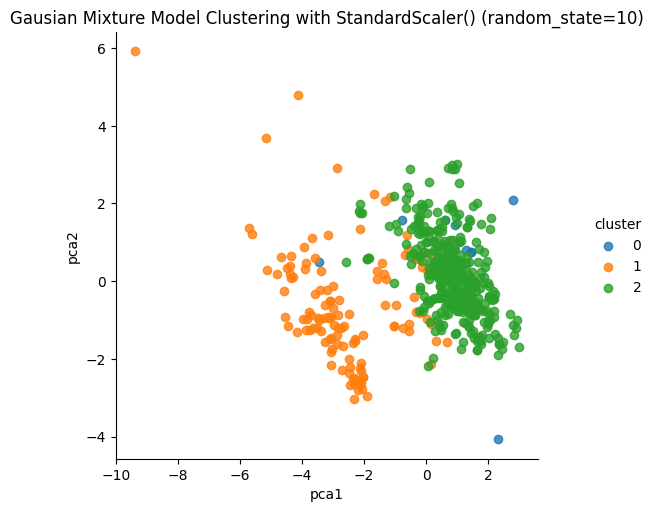

GaussianMixture(n_components=3, random_state=100)
(array([0, 1, 2]), array([ 26, 403,  88]))


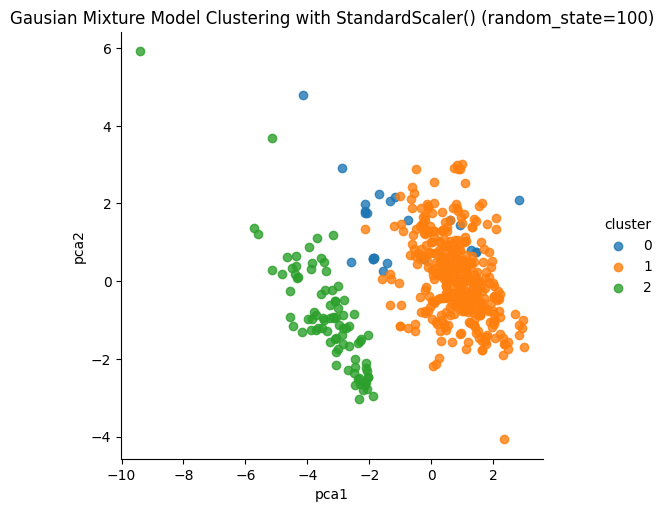

GaussianMixture(n_components=3, random_state=1000)
(array([0, 1, 2]), array([407,  10, 100]))


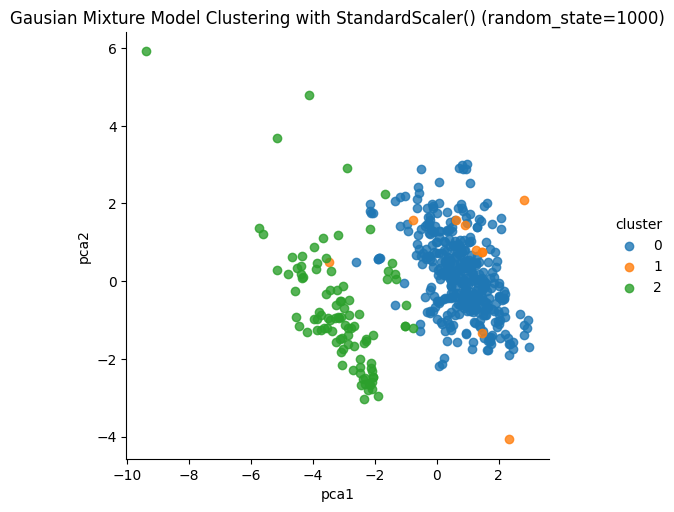

MinMaxScaler()
GaussianMixture(n_components=3, random_state=0)
(array([0, 1, 2]), array([ 96, 392,  29]))


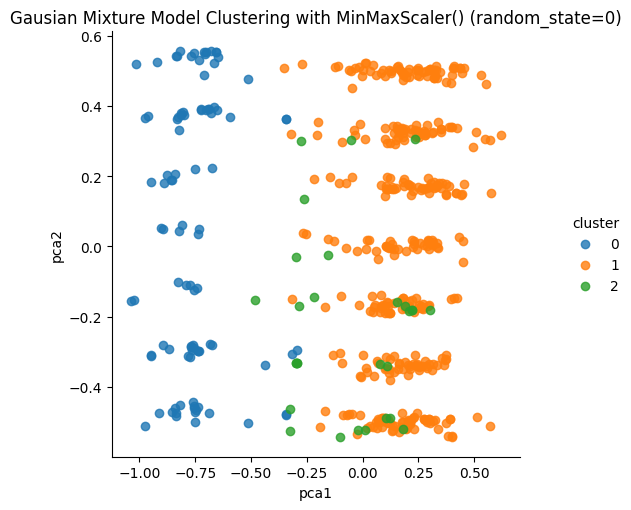

GaussianMixture(n_components=3, random_state=10)
(array([0, 1, 2]), array([392,  96,  29]))


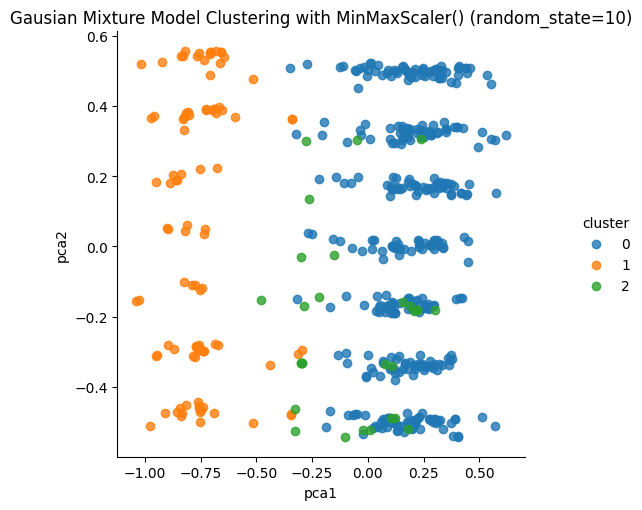

GaussianMixture(n_components=3, random_state=100)
(array([0, 1, 2]), array([392,  29,  96]))


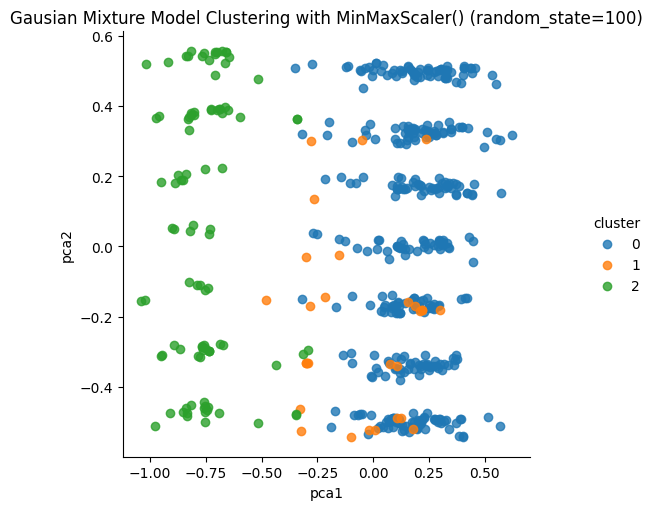

GaussianMixture(n_components=3, random_state=1000)
(array([0, 1, 2]), array([ 29, 392,  96]))


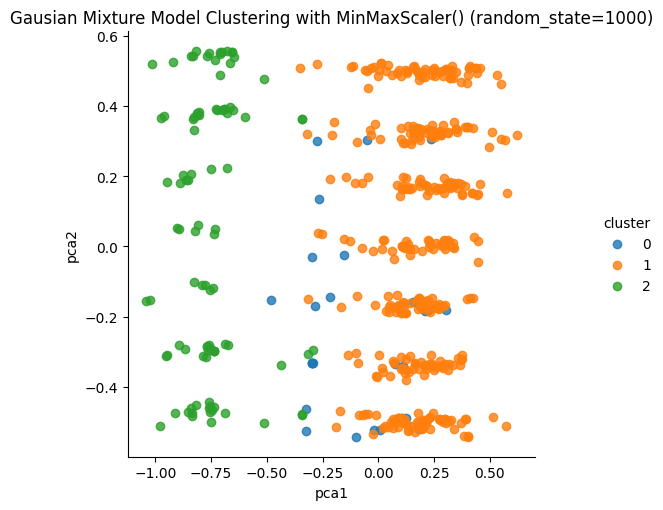

Normalizer()
GaussianMixture(n_components=3, random_state=0)
(array([0, 1, 2]), array([ 39, 429,  49]))


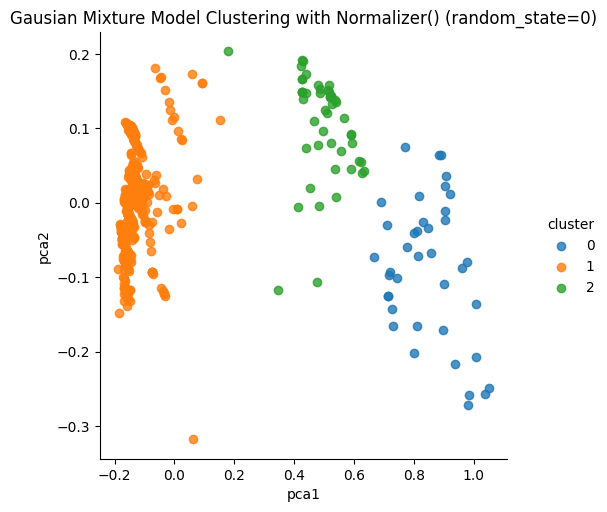

GaussianMixture(n_components=3, random_state=10)
(array([0, 1, 2]), array([429,  39,  49]))


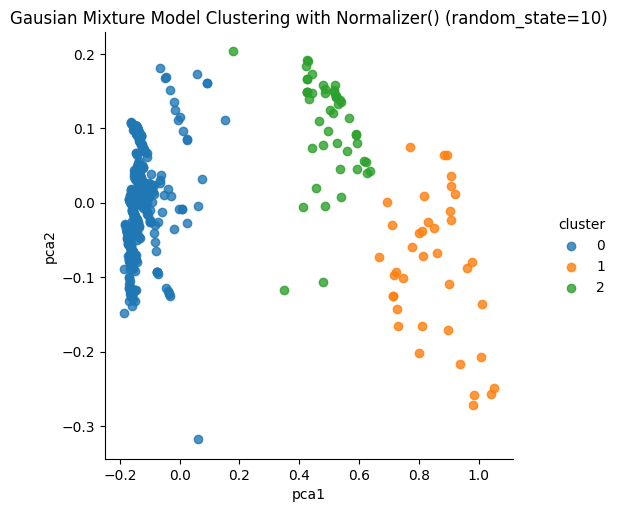

GaussianMixture(n_components=3, random_state=100)
(array([0, 1, 2]), array([ 36,  87, 394]))


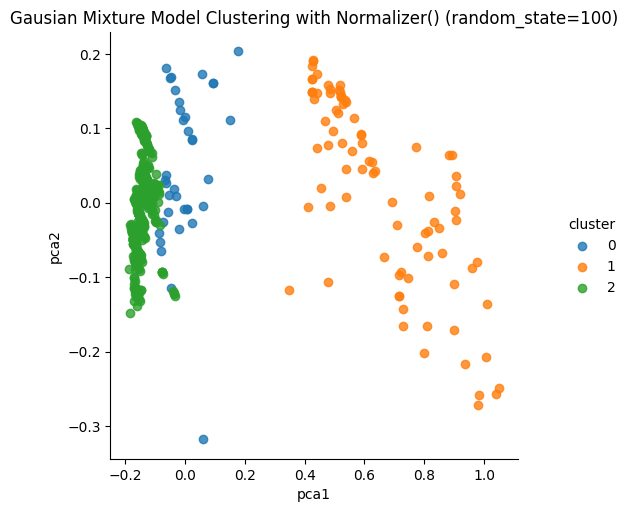

GaussianMixture(n_components=3, random_state=1000)
(array([0, 1, 2]), array([429,  49,  39]))


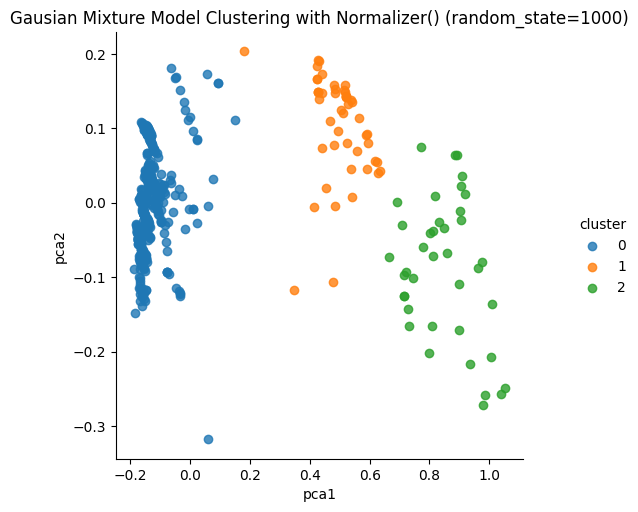

In [30]:
# Scale the features using MinMaxScaler
for scaler in scalers.values():
    print(scaler)
    for r in randomStates:
        scaled_data = scaler.fit_transform(df)

        gmm = GaussianMixture(n_components = 3, random_state=r).fit(scaled_data) 
        print(gmm)
        print(np.unique(gmm.predict(scaled_data), return_counts=True))

        # Create a DataFrame for cluster labels
        cluster_df = pd.DataFrame(gmm.predict(scaled_data), columns=['cluster'])

        # Perform PCA
        pca = PCA(n_components=2).fit(scaled_data)
        pca_trans = pca.transform(scaled_data)
        pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

        # Concatenate cluster labels and PCA components
        result_df = pd.concat([cluster_df, pca_trans_df], axis=1)

        # Plot the results using sns.lmplot
        fig = sns.lmplot(x='pca1', y='pca2', data=result_df, hue='cluster', fit_reg=False)
        plt.title(f'Gausian Mixture Model Clustering with {scaler} (random_state={r})')
        plt.show()

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import describe

In [32]:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'

# load the dataset
df = pd.read_csv(url)

# Convert categorical variables
df['month'] = pd.Categorical(df['month']).codes
df['day'] = pd.Categorical(df['day']).codes

# Prepare feature matrix
X = df.drop('area', axis=1)

# Initialize scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

In [33]:
# Initialize clustering algorithms
def get_clustering_algorithms():
    return {
        'KMeans': KMeans(n_clusters=3, random_state=42),
        'Hierarchical': AgglomerativeClustering(n_clusters=3),
        'GMM': GaussianMixture(n_components=3, random_state=42),
        # 'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    }

In [34]:
# Function to compute clustering metrics
def compute_clustering_metrics(X, labels):
    try:
        sil_score = silhouette_score(X, labels)
        cal_score = calinski_harabasz_score(X, labels)
        dav_score = davies_bouldin_score(X, labels)
        return sil_score, cal_score, dav_score
    except:
        return None, None, None

In [35]:
# Function to analyze feature distributions
def analyze_distributions(X, title):
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(X.columns, 1):
        plt.subplot(2, 6, i)
        sns.histplot(X[column], kde=True)
        plt.title(column)
    plt.suptitle(f'Feature Distributions - {title}')
    plt.tight_layout()
    plt.show()

In [36]:
# Function to visualize clustering results
def plot_clustering_results(X, labels, title):
    plt.figure(figsize=(15, 5))
    
    # PCA for 2D visualization
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.subplot(131)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.title(f'Clustering Results - {title}')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    
    # Distribution of cluster assignments
    plt.subplot(132)
    unique_labels = np.unique(labels)
    counts = [sum(labels == label) for label in unique_labels]
    plt.bar(range(len(unique_labels)), counts)
    plt.title('Cluster Size Distribution')
    plt.xlabel('Cluster Label')
    plt.ylabel('Number of Samples')
    
    # Silhouette plot
    from sklearn.metrics import silhouette_samples
    plt.subplot(133)
    silhouette_vals = silhouette_samples(X, labels)
    for label in unique_labels:
        cluster_silhouette_vals = silhouette_vals[labels == label]
        y_lower = 10
        plt.fill_betweenx(np.arange(y_lower, y_lower + len(cluster_silhouette_vals)),
                         0, cluster_silhouette_vals,
                         alpha=0.7)
        y_lower += len(cluster_silhouette_vals) + 10
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Score')
    
    plt.tight_layout()
    plt.show()


Analyzing StandardScaler
--------------------------------------------------

Feature Statistics:
DescribeResult(nobs=6204, minmax=(np.float64(-13.045817904306904), np.float64(21.572283715947112)), mean=np.float64(-8.246143935320312e-17), variance=np.float64(1.000161212316621), skewness=np.float64(1.4143995012577186), kurtosis=np.float64(41.899922501748385))


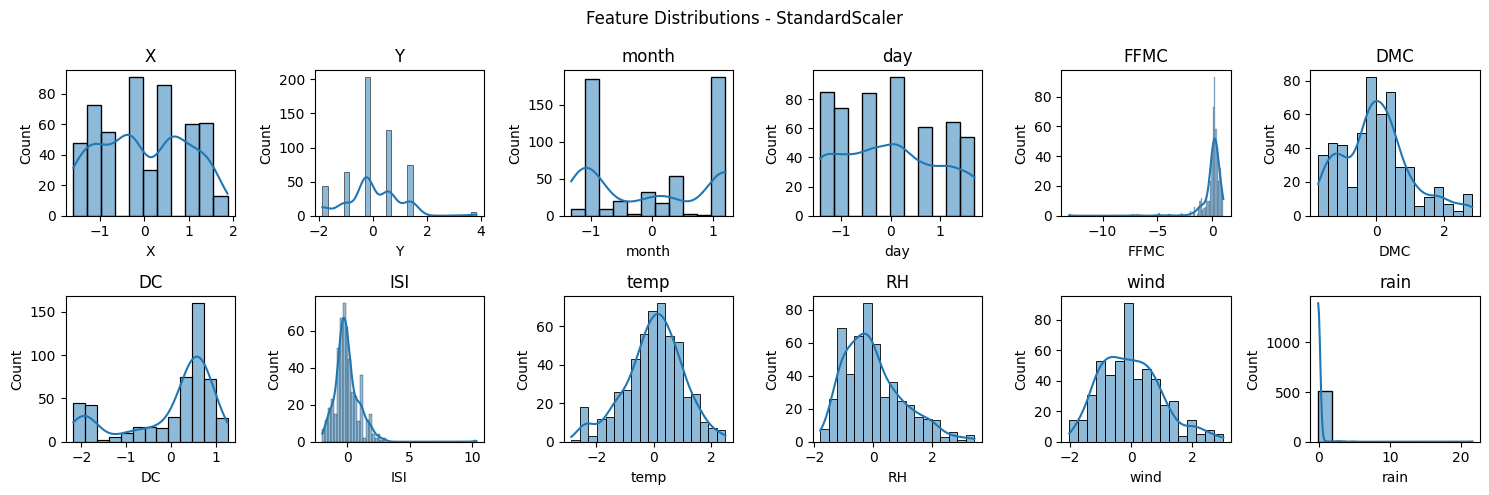


Applying KMeans with StandardScaler


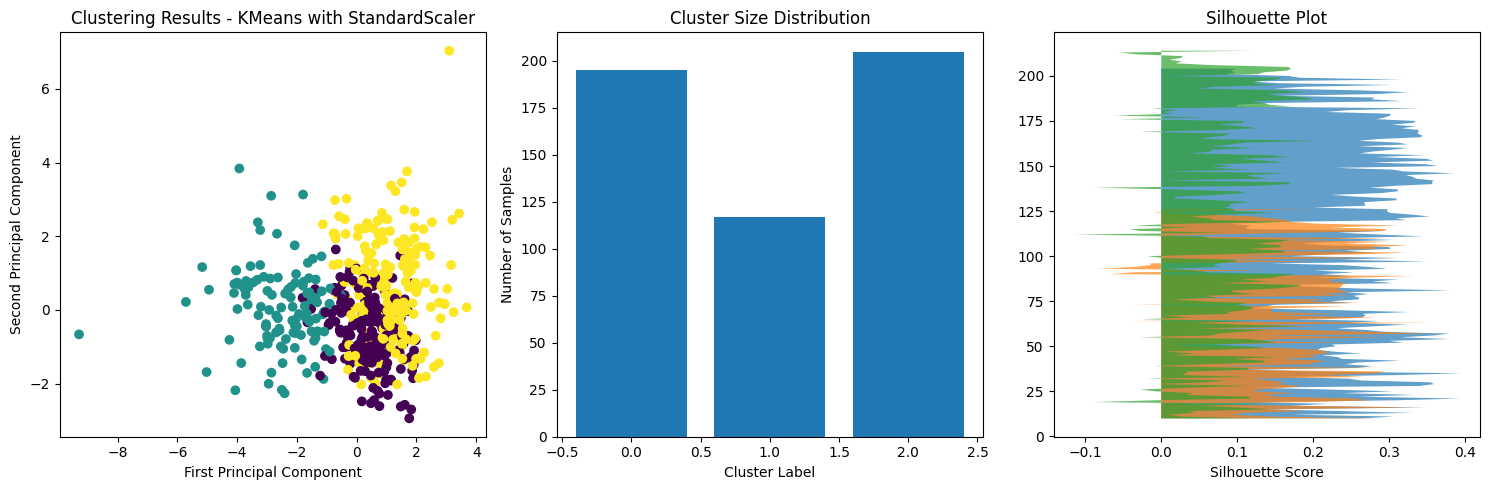

Silhouette Score: 0.171

Applying Hierarchical with StandardScaler


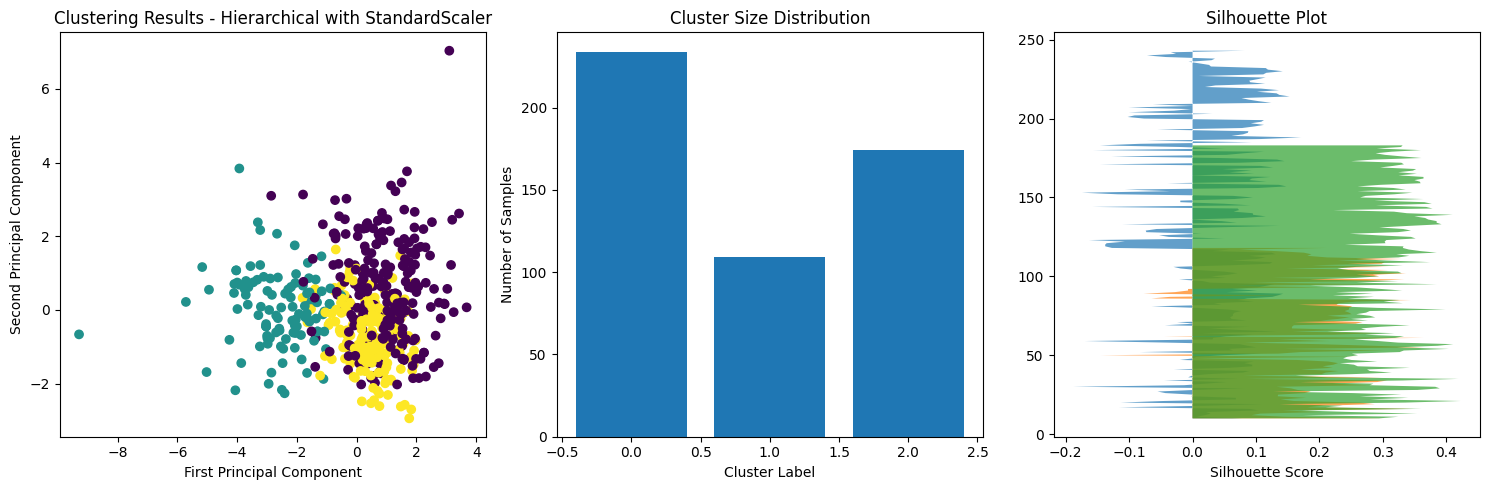

Silhouette Score: 0.158

Applying GMM with StandardScaler


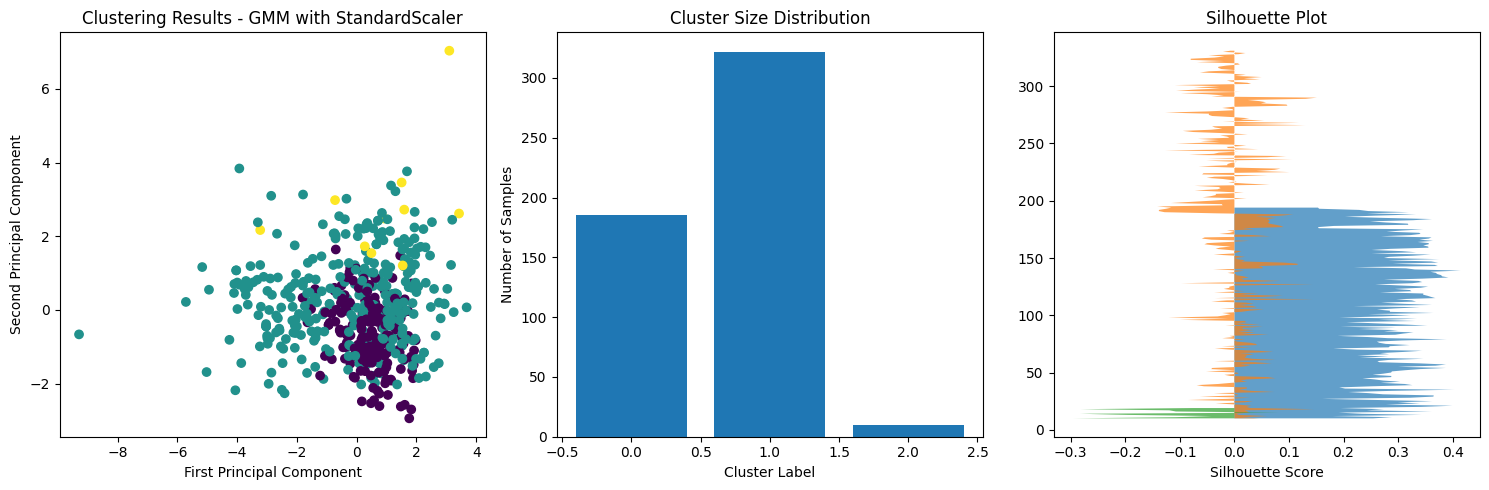

Silhouette Score: 0.104

Analyzing MinMaxScaler
--------------------------------------------------

Feature Statistics:
DescribeResult(nobs=6204, minmax=(np.float64(0.0), np.float64(1.0000000000000002)), mean=np.float64(0.4295078888934989), variance=np.float64(0.10164870965721685), skewness=np.float64(0.33648336365540654), kurtosis=np.float64(-1.1314076095150032))


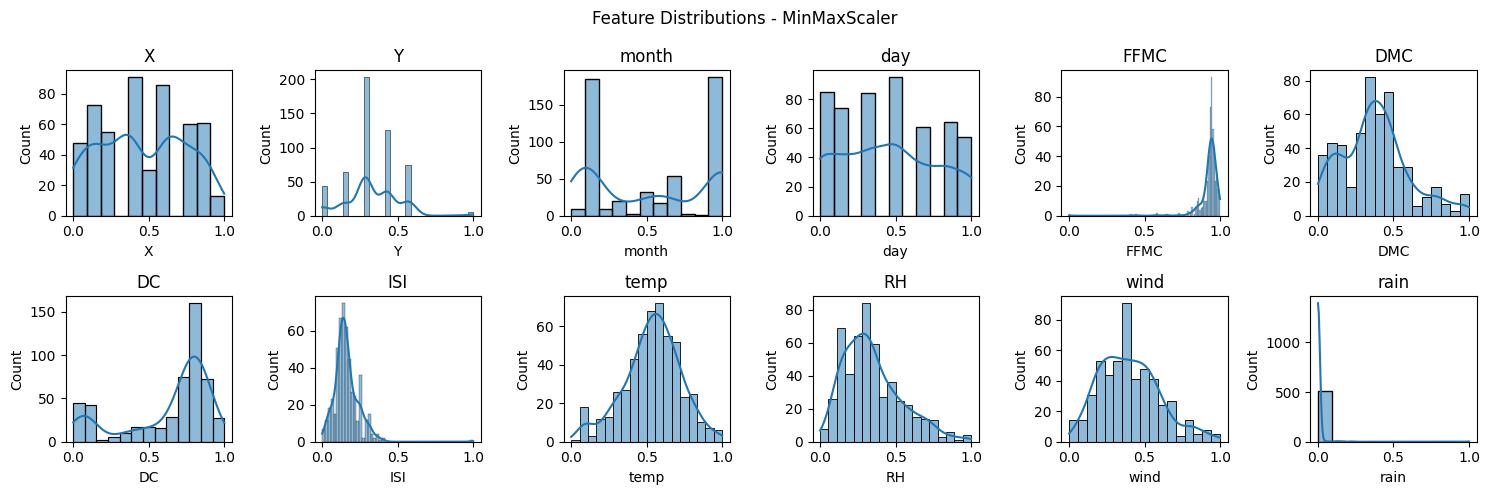


Applying KMeans with MinMaxScaler


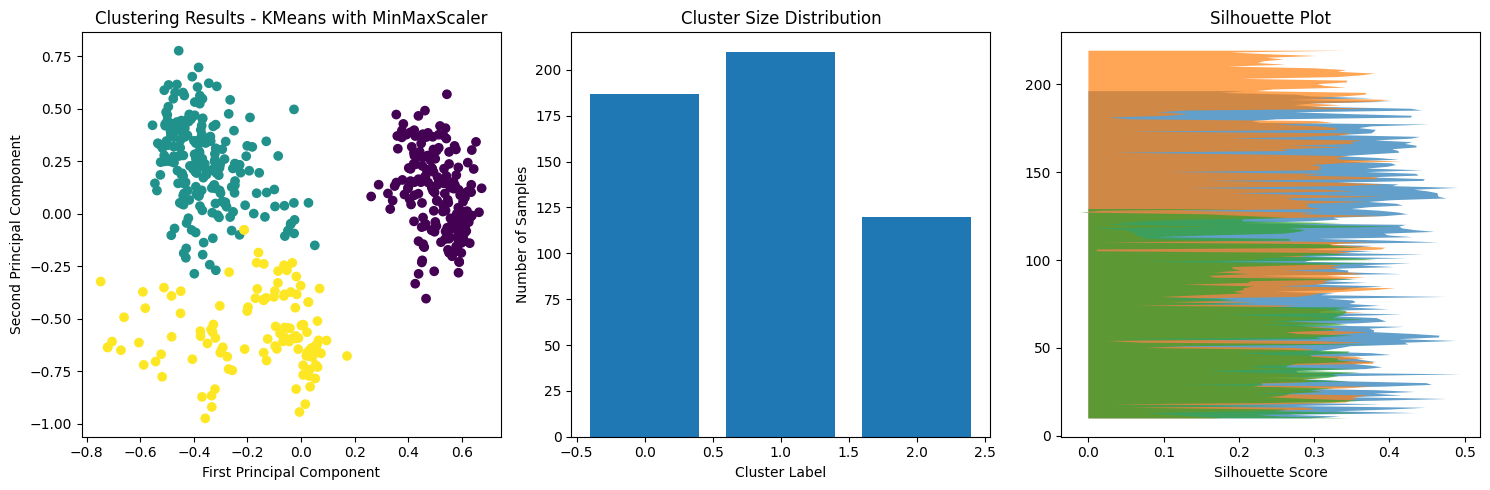

Silhouette Score: 0.301

Applying Hierarchical with MinMaxScaler


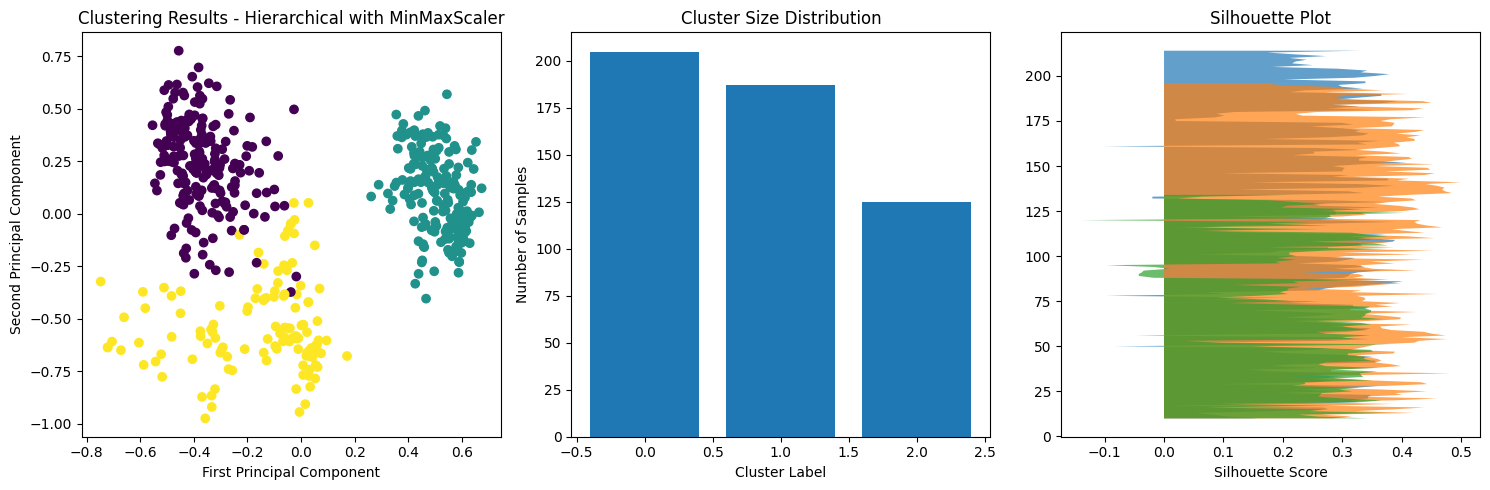

Silhouette Score: 0.294

Applying GMM with MinMaxScaler


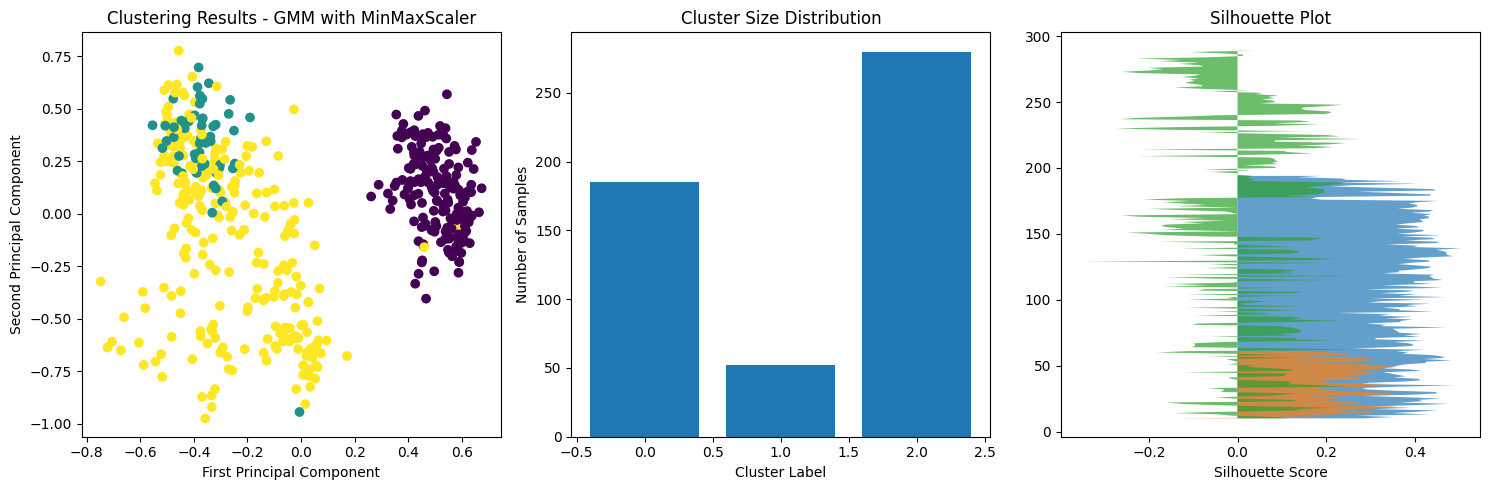

Silhouette Score: 0.170

Analyzing Normalizer
--------------------------------------------------

Feature Statistics:
DescribeResult(nobs=6204, minmax=(np.float64(0.0), np.float64(0.9890686755043794)), mean=np.float64(0.1294964301416529), variance=np.float64(0.06657473885182072), skewness=np.float64(2.539369160677523), kurtosis=np.float64(5.174325986051368))


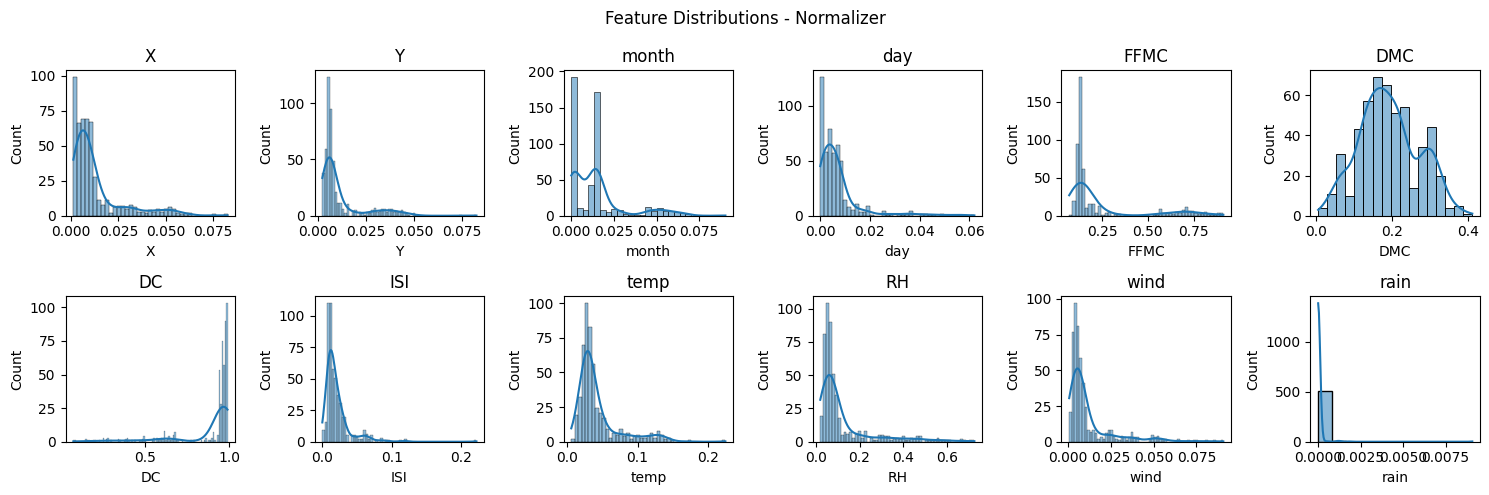


Applying KMeans with Normalizer


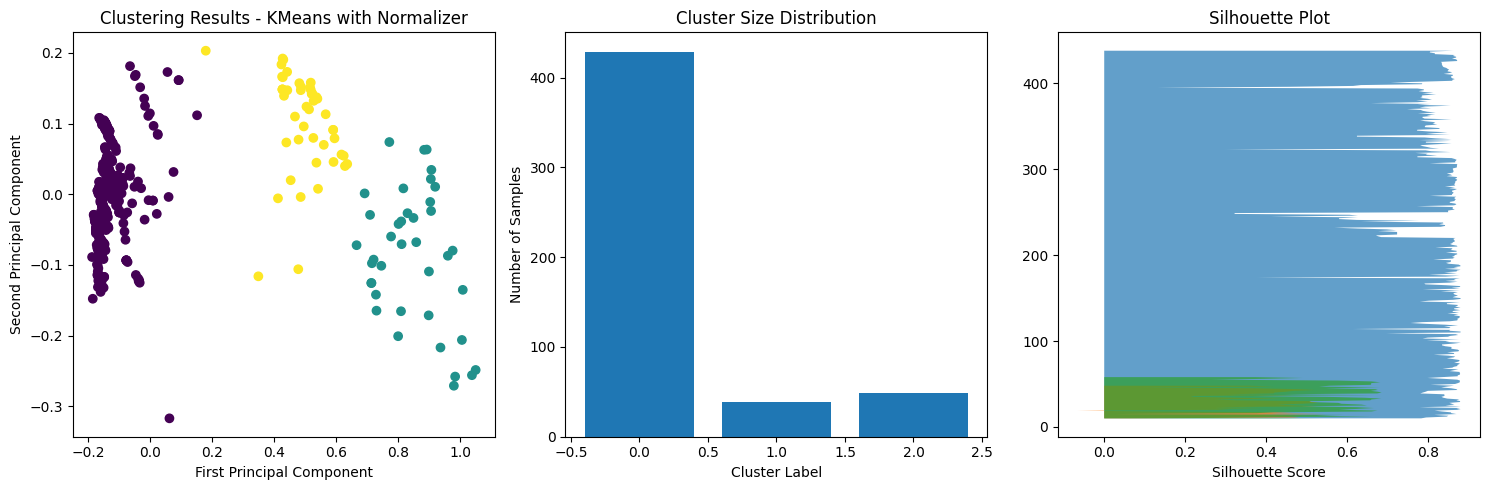

Silhouette Score: 0.766

Applying Hierarchical with Normalizer


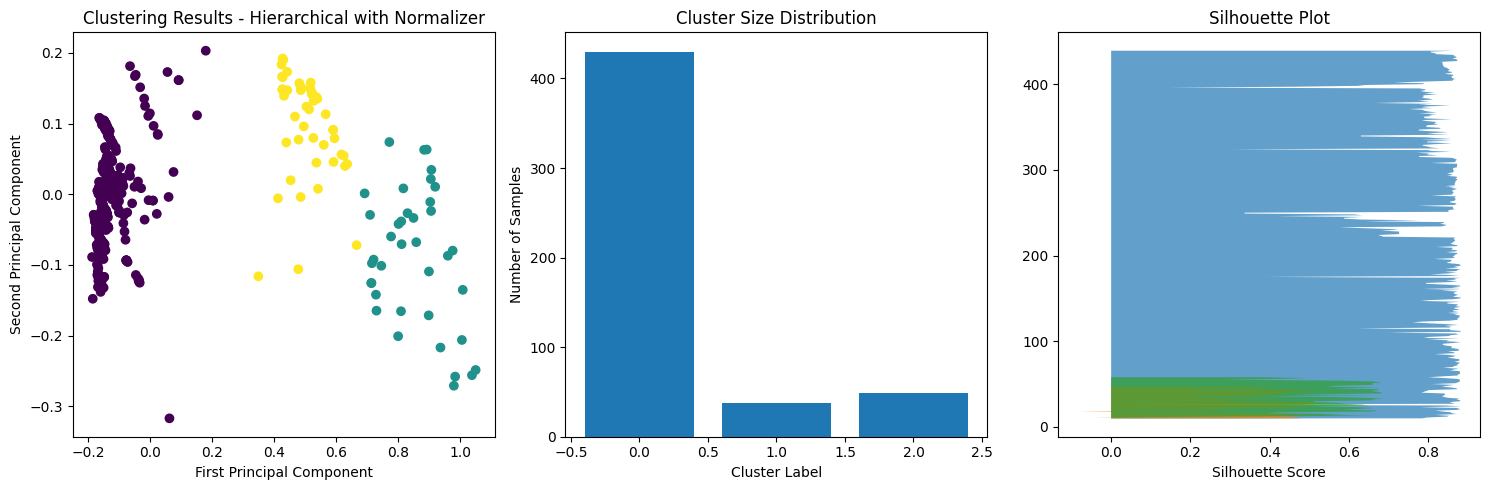

Silhouette Score: 0.766

Applying GMM with Normalizer


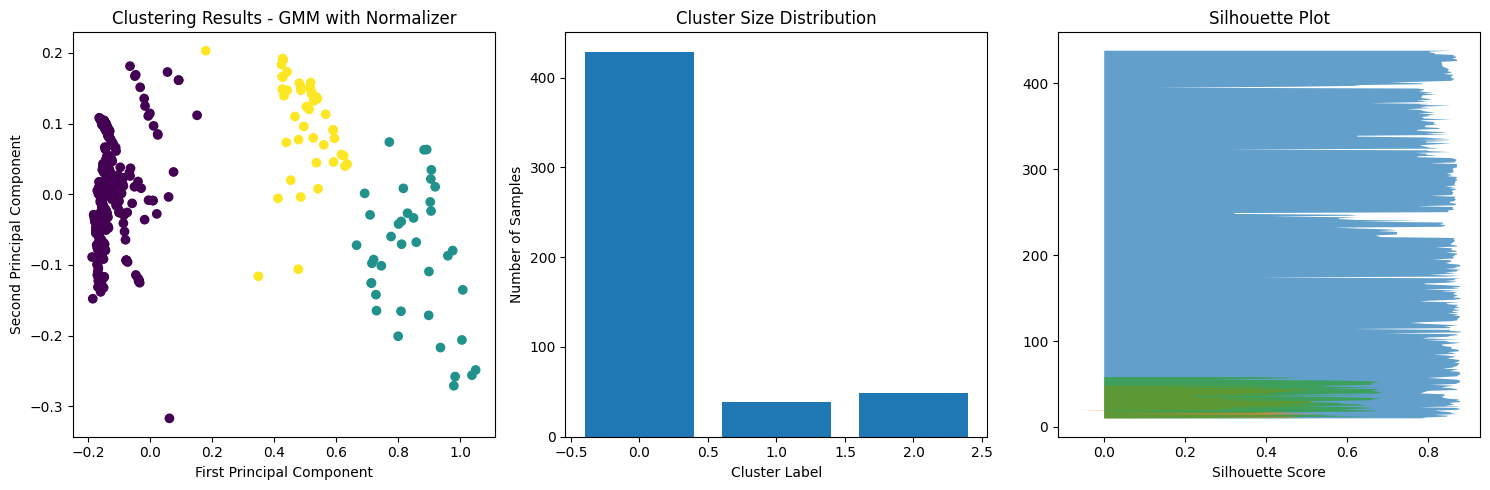

Silhouette Score: 0.766


In [37]:
# Initialize results storage
results = []

# Perform analysis for each scaler
for scaler_name, scaler in scalers.items():
    print(f"\nAnalyzing {scaler_name}")
    print("-" * 50)
    
    # Scale the data
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    
    # Analyze and plot distributions
    print("\nFeature Statistics:")
    print(describe(X_scaled.flatten()))
    analyze_distributions(X_scaled_df, scaler_name)
    
    # Apply clustering algorithms
    clustering_algorithms = get_clustering_algorithms()
    
    for algo_name, algo in clustering_algorithms.items():
        print(f"\nApplying {algo_name} with {scaler_name}")
        
        # Fit and predict
        labels = algo.fit_predict(X_scaled)
        
        # Compute metrics
        sil_score, cal_score, dav_score = compute_clustering_metrics(X_scaled, labels)
        
        # Store results
        results.append({
            'Scaler': scaler_name,
            'Algorithm': algo_name,
            'Silhouette': sil_score,
        })
        
        # Plot clustering results
        plot_clustering_results(X_scaled, labels, f"{algo_name} with {scaler_name}")
        
        print(f"Silhouette Score: {sil_score:.3f}")

In [38]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Overall

Normalizer is the best scaling method for all 3 types of clustering (hierarchical, k-means, and GMM) based on the silhouette score.

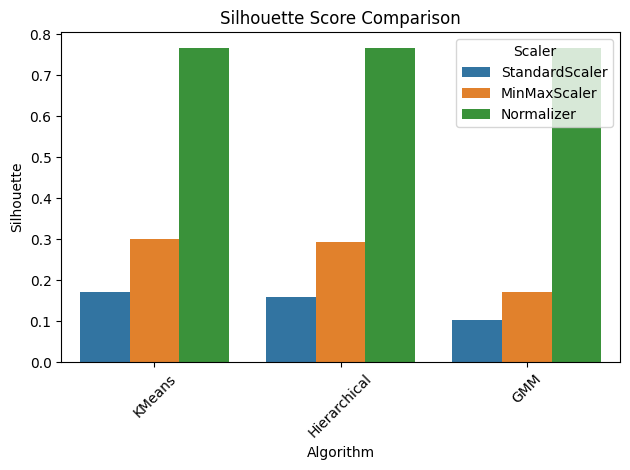

In [ ]:
# Silhouette Score Comparison
sns.barplot(data=results_df, x='Algorithm', y='Silhouette', hue='Scaler')
plt.title('Silhouette Score Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [45]:
# Print summary table
print("\nSummary of Results:")
print(results_df.round(3).to_string(index=False))


Summary of Results:
        Scaler    Algorithm  Silhouette
StandardScaler       KMeans       0.171
StandardScaler Hierarchical       0.158
StandardScaler          GMM       0.104
  MinMaxScaler       KMeans       0.301
  MinMaxScaler Hierarchical       0.294
  MinMaxScaler          GMM       0.170
    Normalizer       KMeans       0.766
    Normalizer Hierarchical       0.766
    Normalizer          GMM       0.766


In [46]:
# Statistical analysis of the impact
print("\nStatistical Analysis of Scaling Impact:")
for metric in ['Silhouette']:
    print(f"\n{metric} Score Analysis:")
    print(results_df.pivot_table(
        values=metric,
        index='Algorithm',
        columns='Scaler',
        aggfunc='mean'
    ).round(3))


Statistical Analysis of Scaling Impact:

Silhouette Score Analysis:
Scaler        MinMaxScaler  Normalizer  StandardScaler
Algorithm                                             
GMM                  0.170       0.766           0.104
Hierarchical         0.294       0.766           0.158
KMeans               0.301       0.766           0.171


In [47]:
# Feature variance analysis
print("\nFeature Variance Analysis:")
for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)
    variances = np.var(X_scaled, axis=0)
    print(f"\n{scaler_name} Feature Variances:")
    for feature, variance in zip(X.columns, variances):
        print(f"{feature}: {variance:.3f}")


Feature Variance Analysis:

StandardScaler Feature Variances:
X: 1.000
Y: 1.000
month: 1.000
day: 1.000
FFMC: 1.000
DMC: 1.000
DC: 1.000
ISI: 1.000
temp: 1.000
RH: 1.000
wind: 1.000
rain: 1.000

MinMaxScaler Feature Variances:
X: 0.083
Y: 0.031
month: 0.158
day: 0.103
FFMC: 0.005
DMC: 0.049
DC: 0.084
ISI: 0.007
temp: 0.035
RH: 0.037
wind: 0.040
rain: 0.002

Normalizer Feature Variances:
X: 0.000
Y: 0.000
month: 0.000
day: 0.000
FFMC: 0.047
DMC: 0.006
DC: 0.036
ISI: 0.000
temp: 0.001
RH: 0.017
wind: 0.000
rain: 0.000
